# <center> Scientific Programming with Python
## <center> Final assignment: Life Expectancy

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** July 2nd, 2021

### Task 1
**Goal**: use Pandas to import life expectancy data<sup>1</sup> from a given csv 
file into a dataframe, while removing incomplete rows. 

The data spans most years from 1960 to 2018; data sets of the years from 1970 to 1975 and
from 1995 to 1999 are missing. Year columns have data type *float* and the remaining
columns possess *string* type. 

|Country Name|Country Code|Region|Income Group|1960|1961|...|1969|1976|...|1994|2000|...|2018|
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|Country 1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country 2|...|...|...|...|...|...|...|...|...|...|...|...|...|
|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|
|Country n-1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country n|...|...|...|...|...|...|...|...|...|...|...|...|...|

**Reference**: 1) Life expectancy at birth, total (years) | Data (2021). Available online 
at https://data.worldbank.org/indicator/SP.DYN.LE00.IN, checked on 6/1/2021.

In [5]:
import warnings
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from scipy.interpolate import interp1d

expectancy_dataframe = pd.read_csv("life_expectancy_numpy_scipy.csv").dropna()  # only read complete data

### Task 2
**Goals**: Fit a polynomial of the 6th degree to the life expectancy data, of a sample of 
five randomly chosen countries. 

Then accordingly plot five graphs where the fitted 
polynomial data and the original life expectancy data overlay.

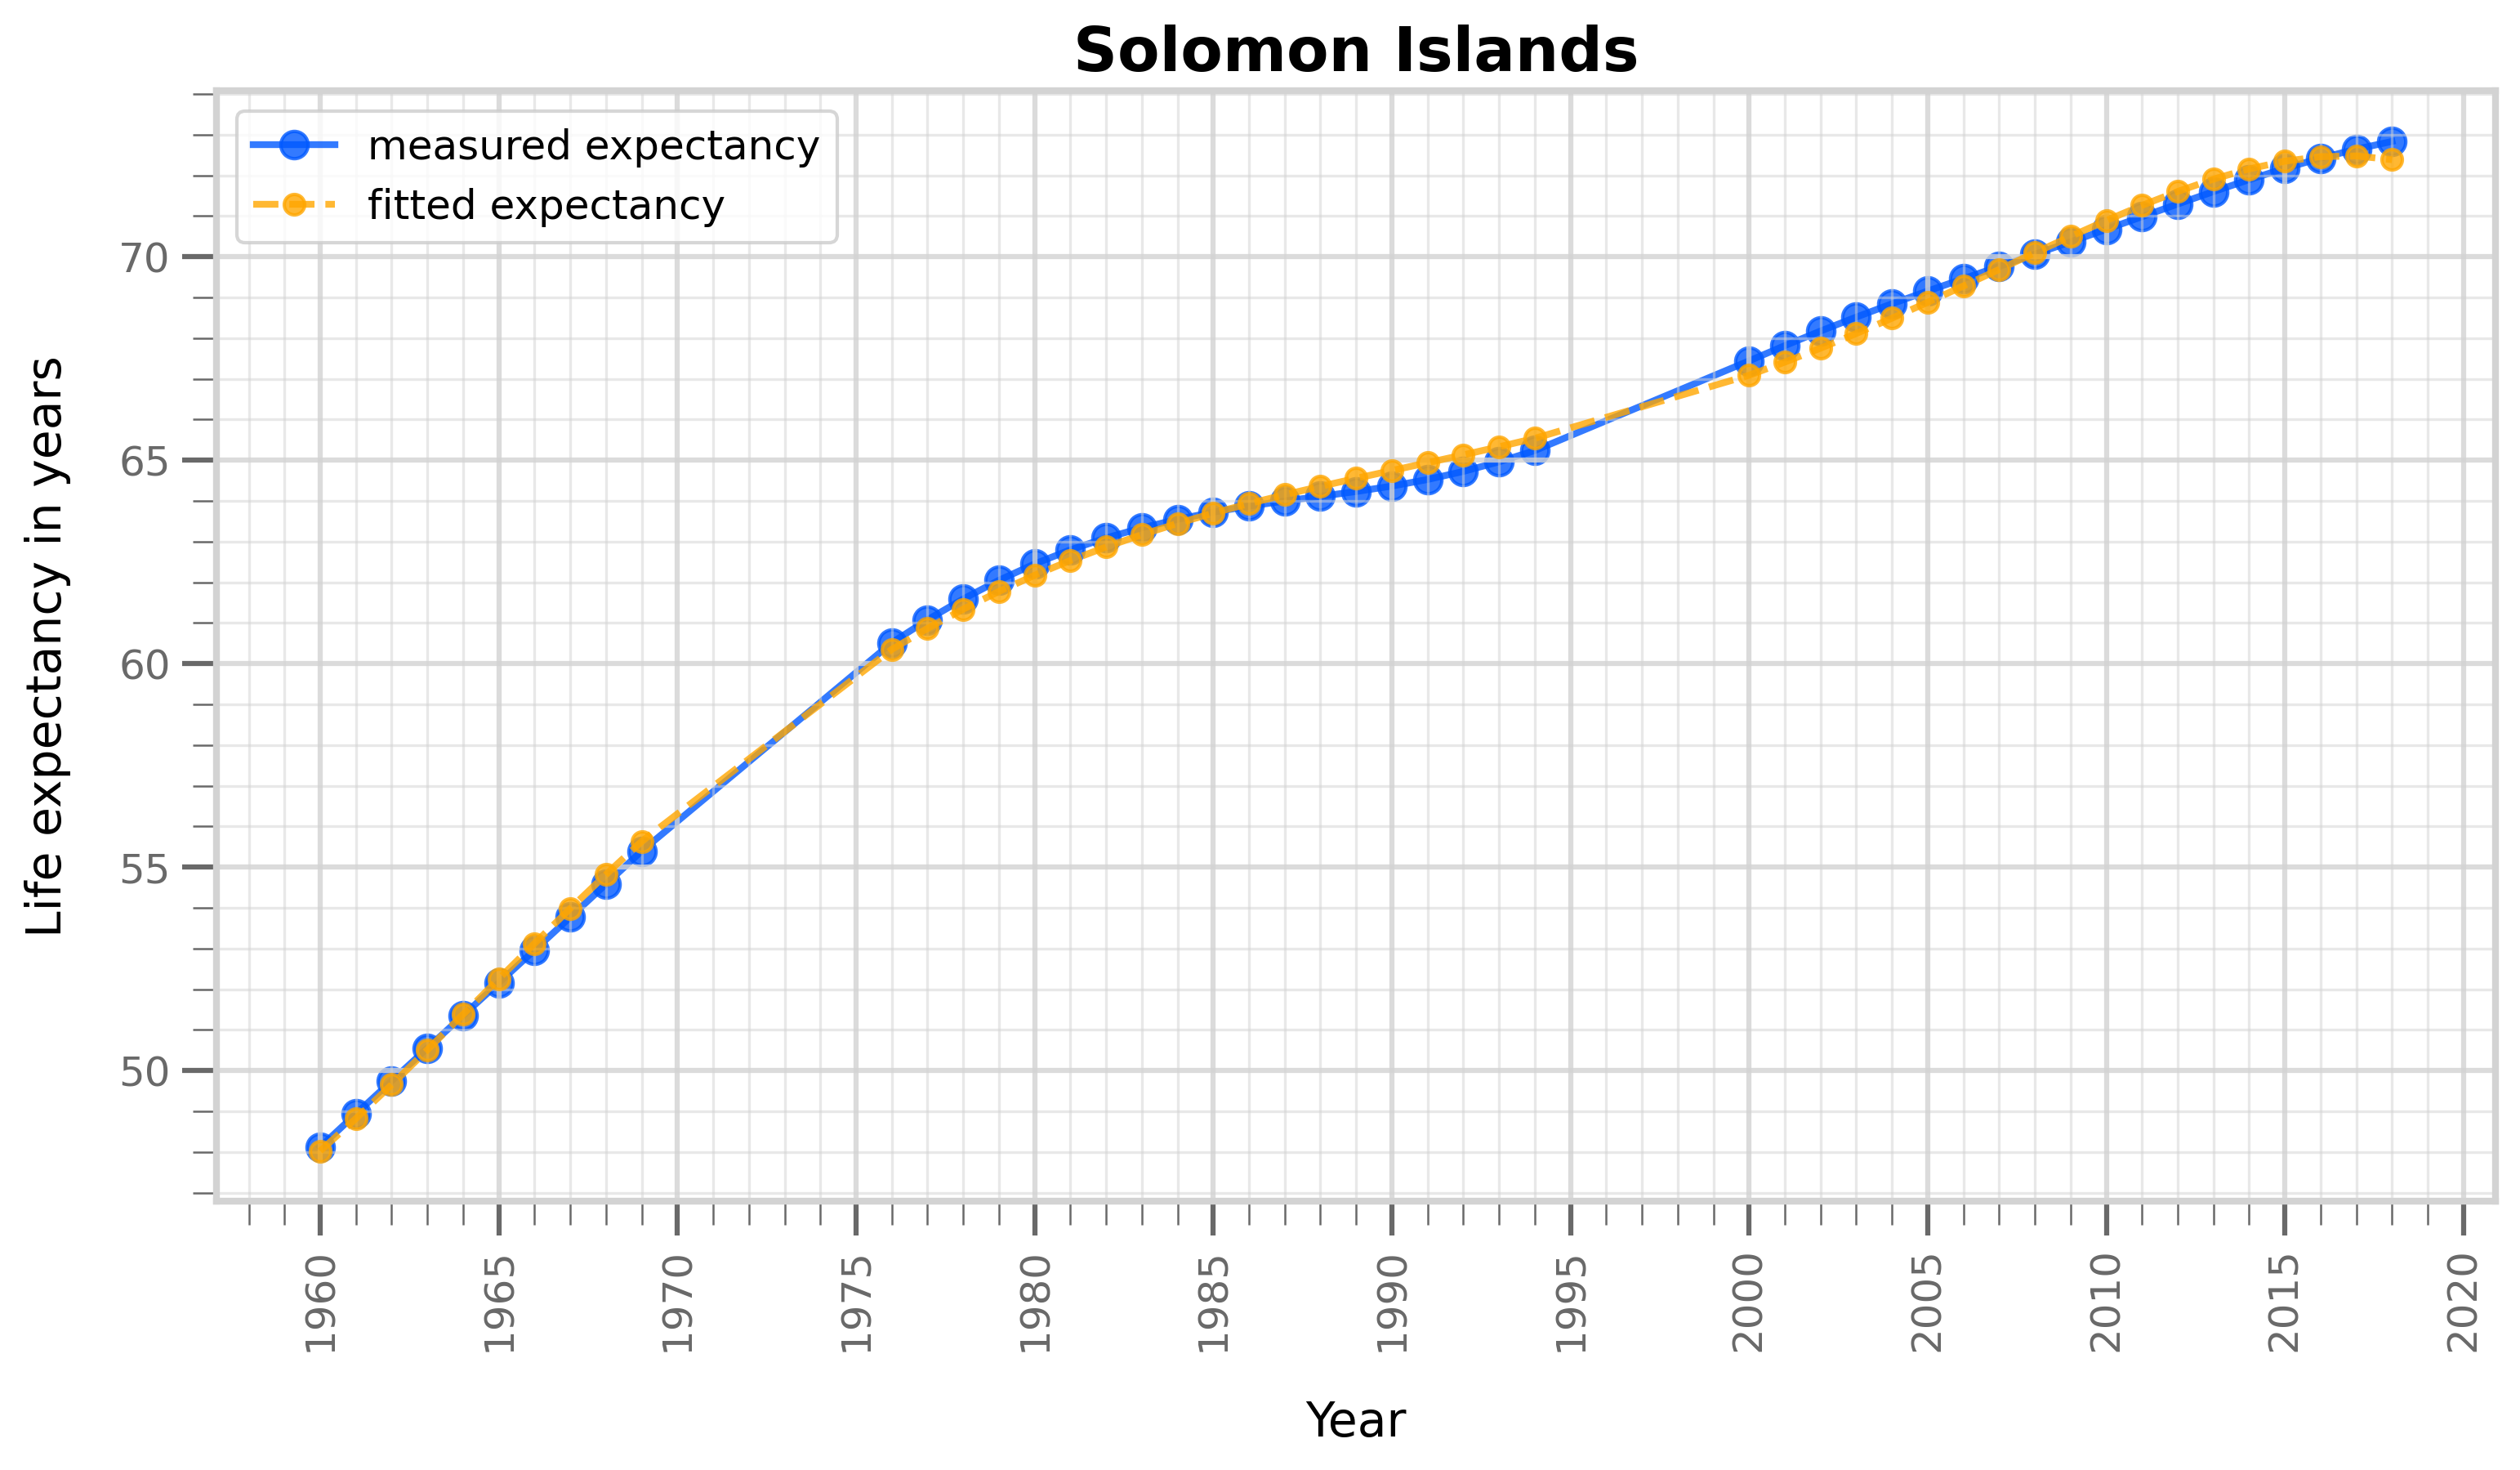

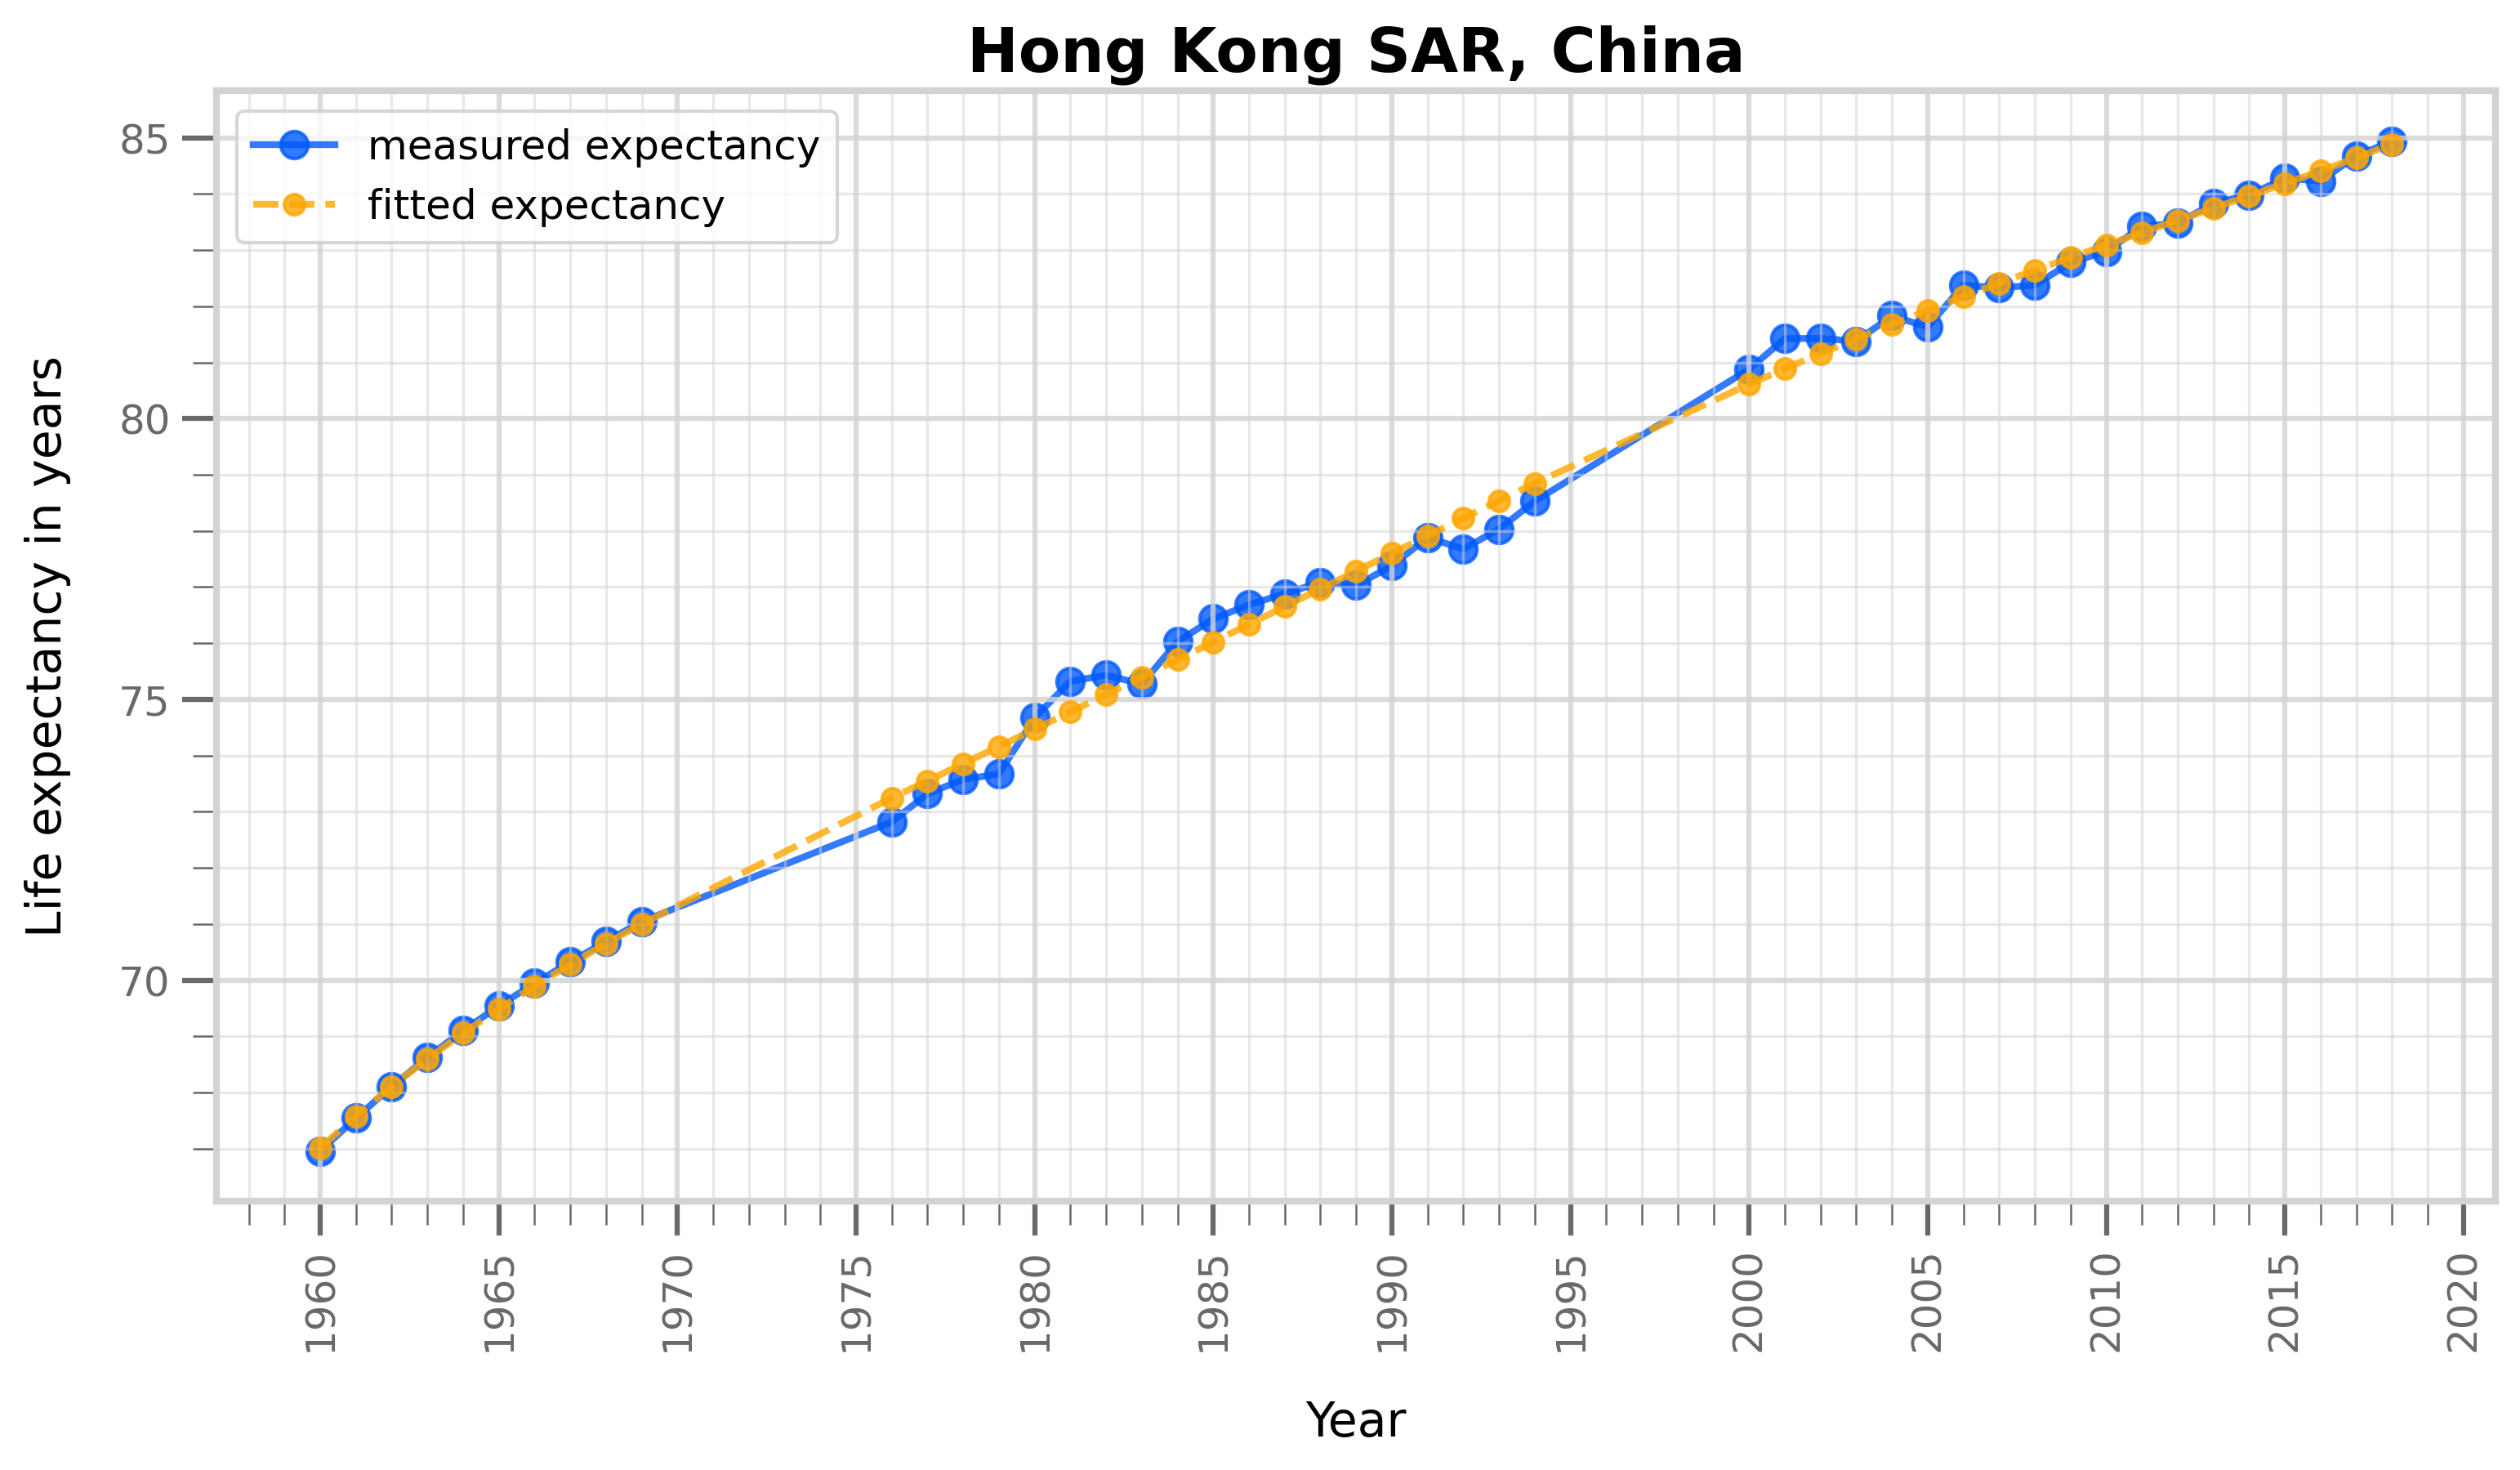

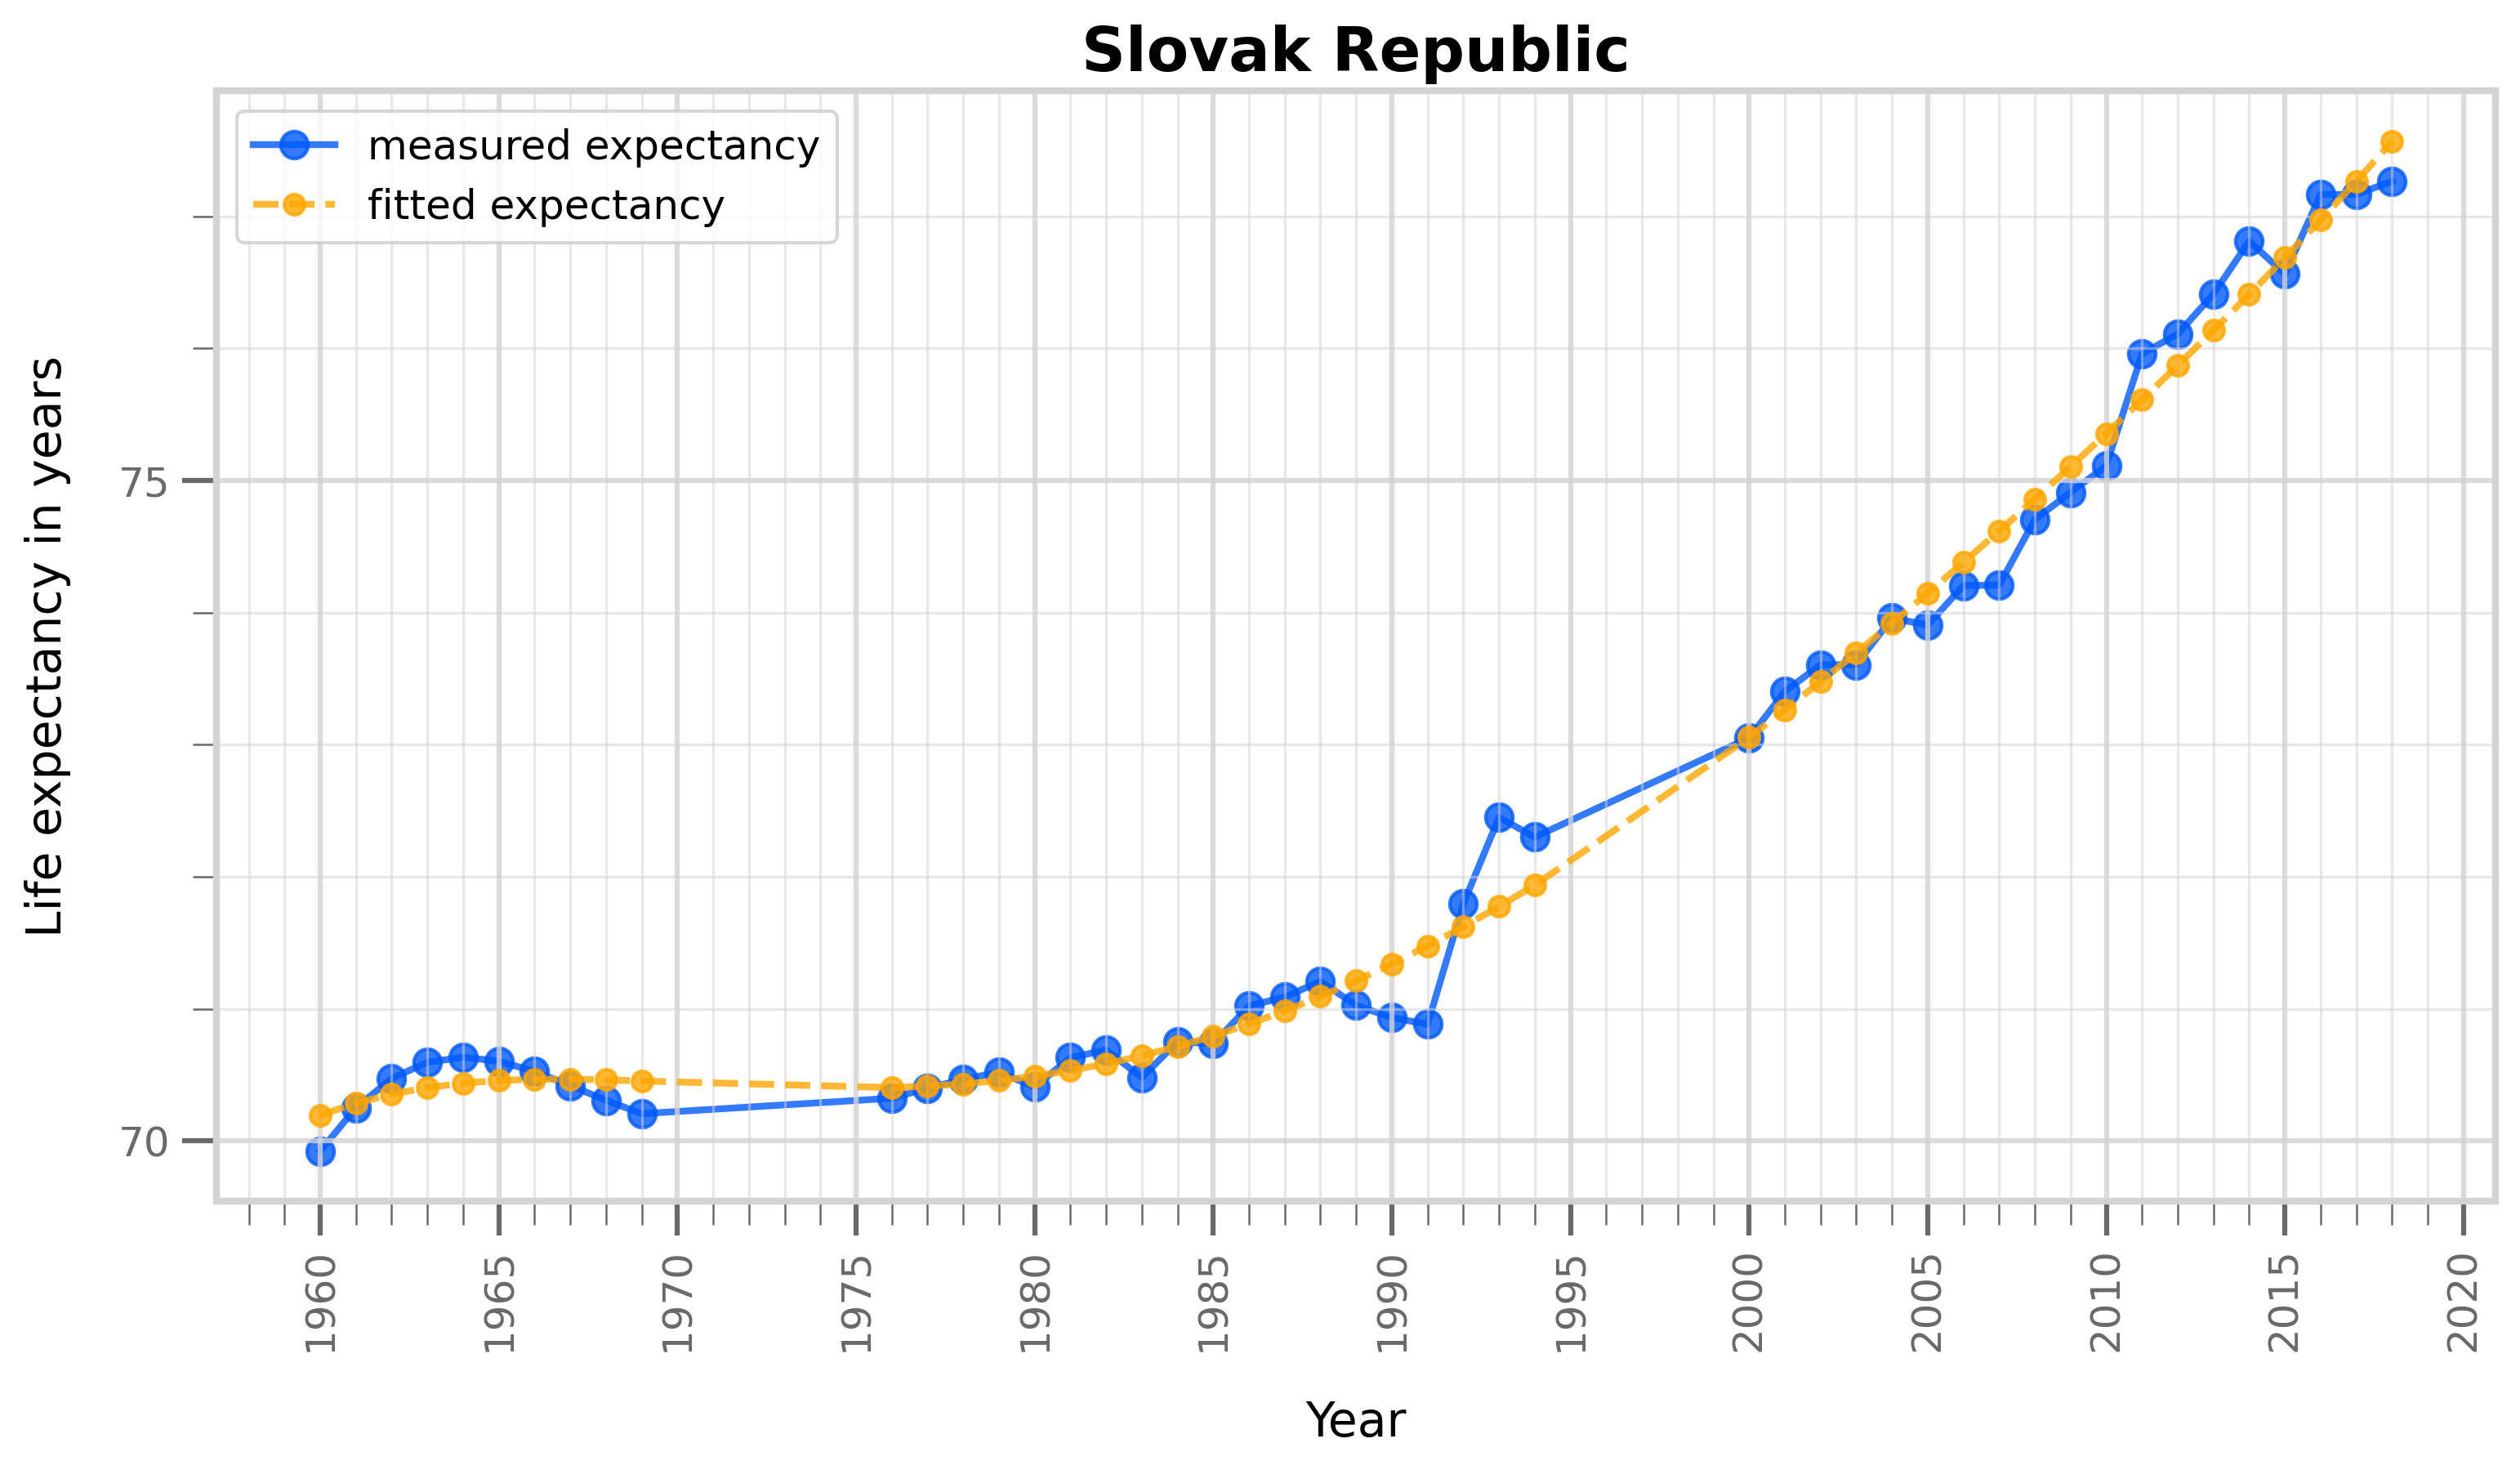

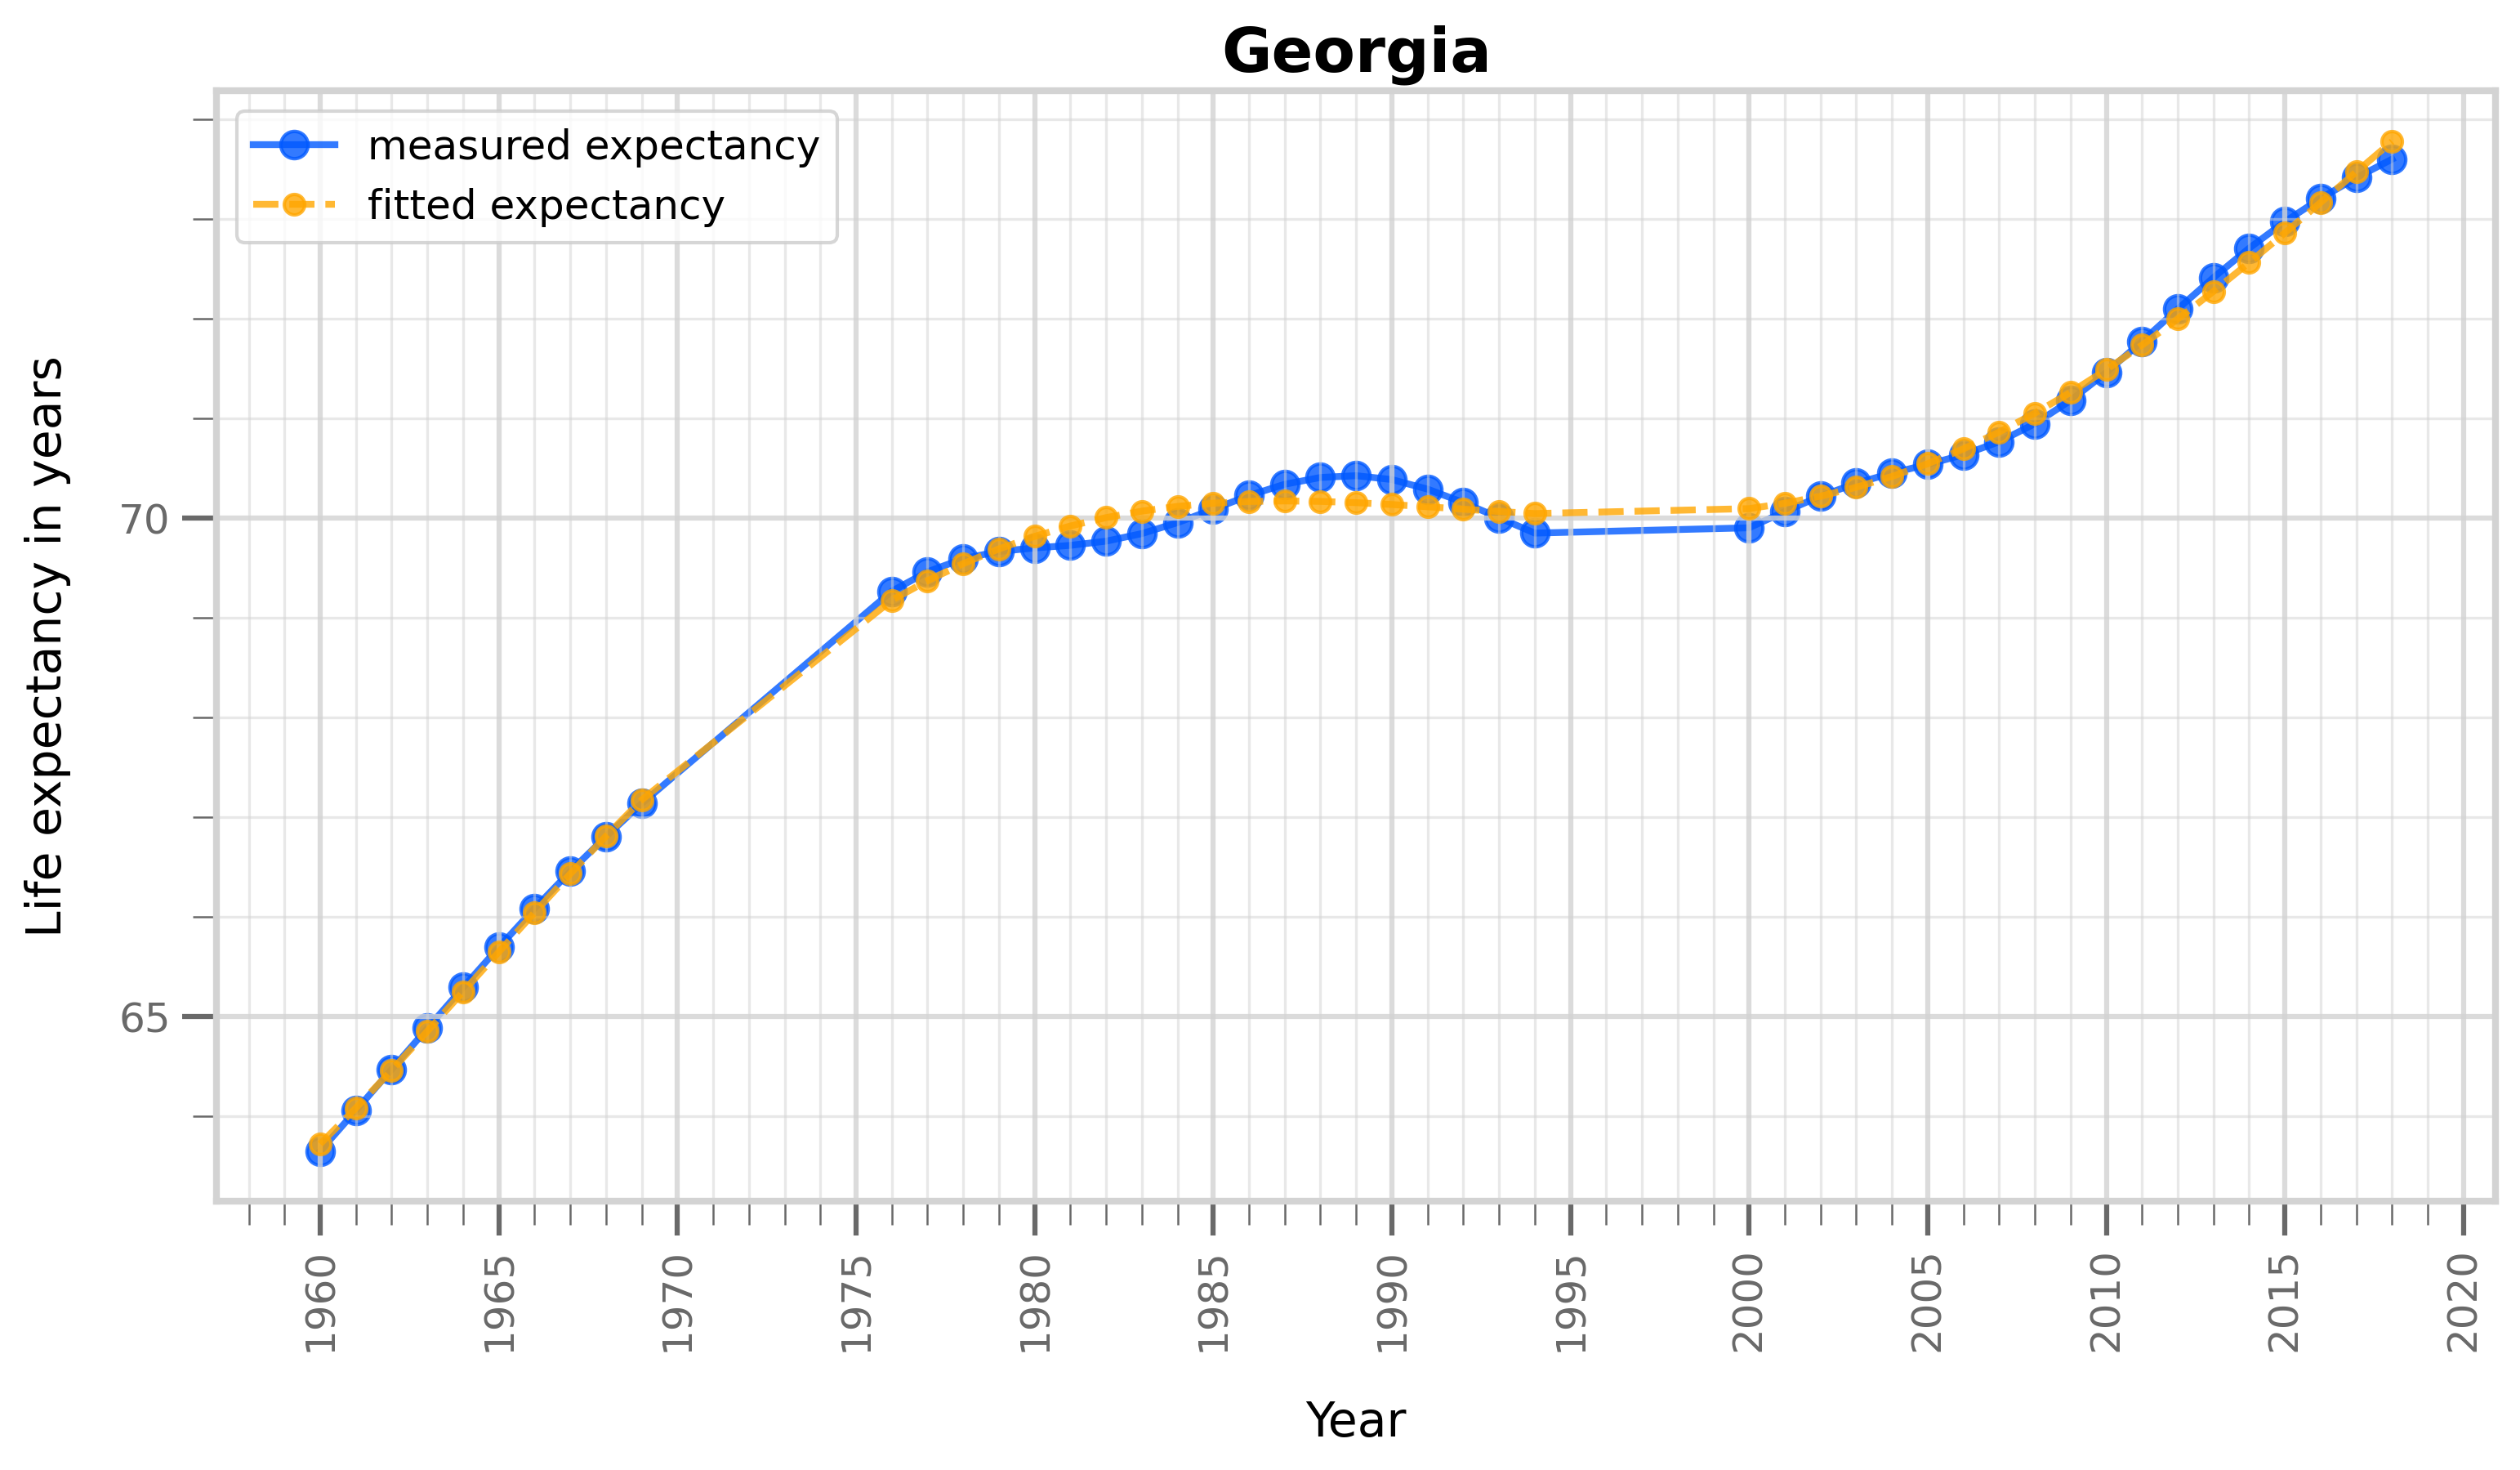

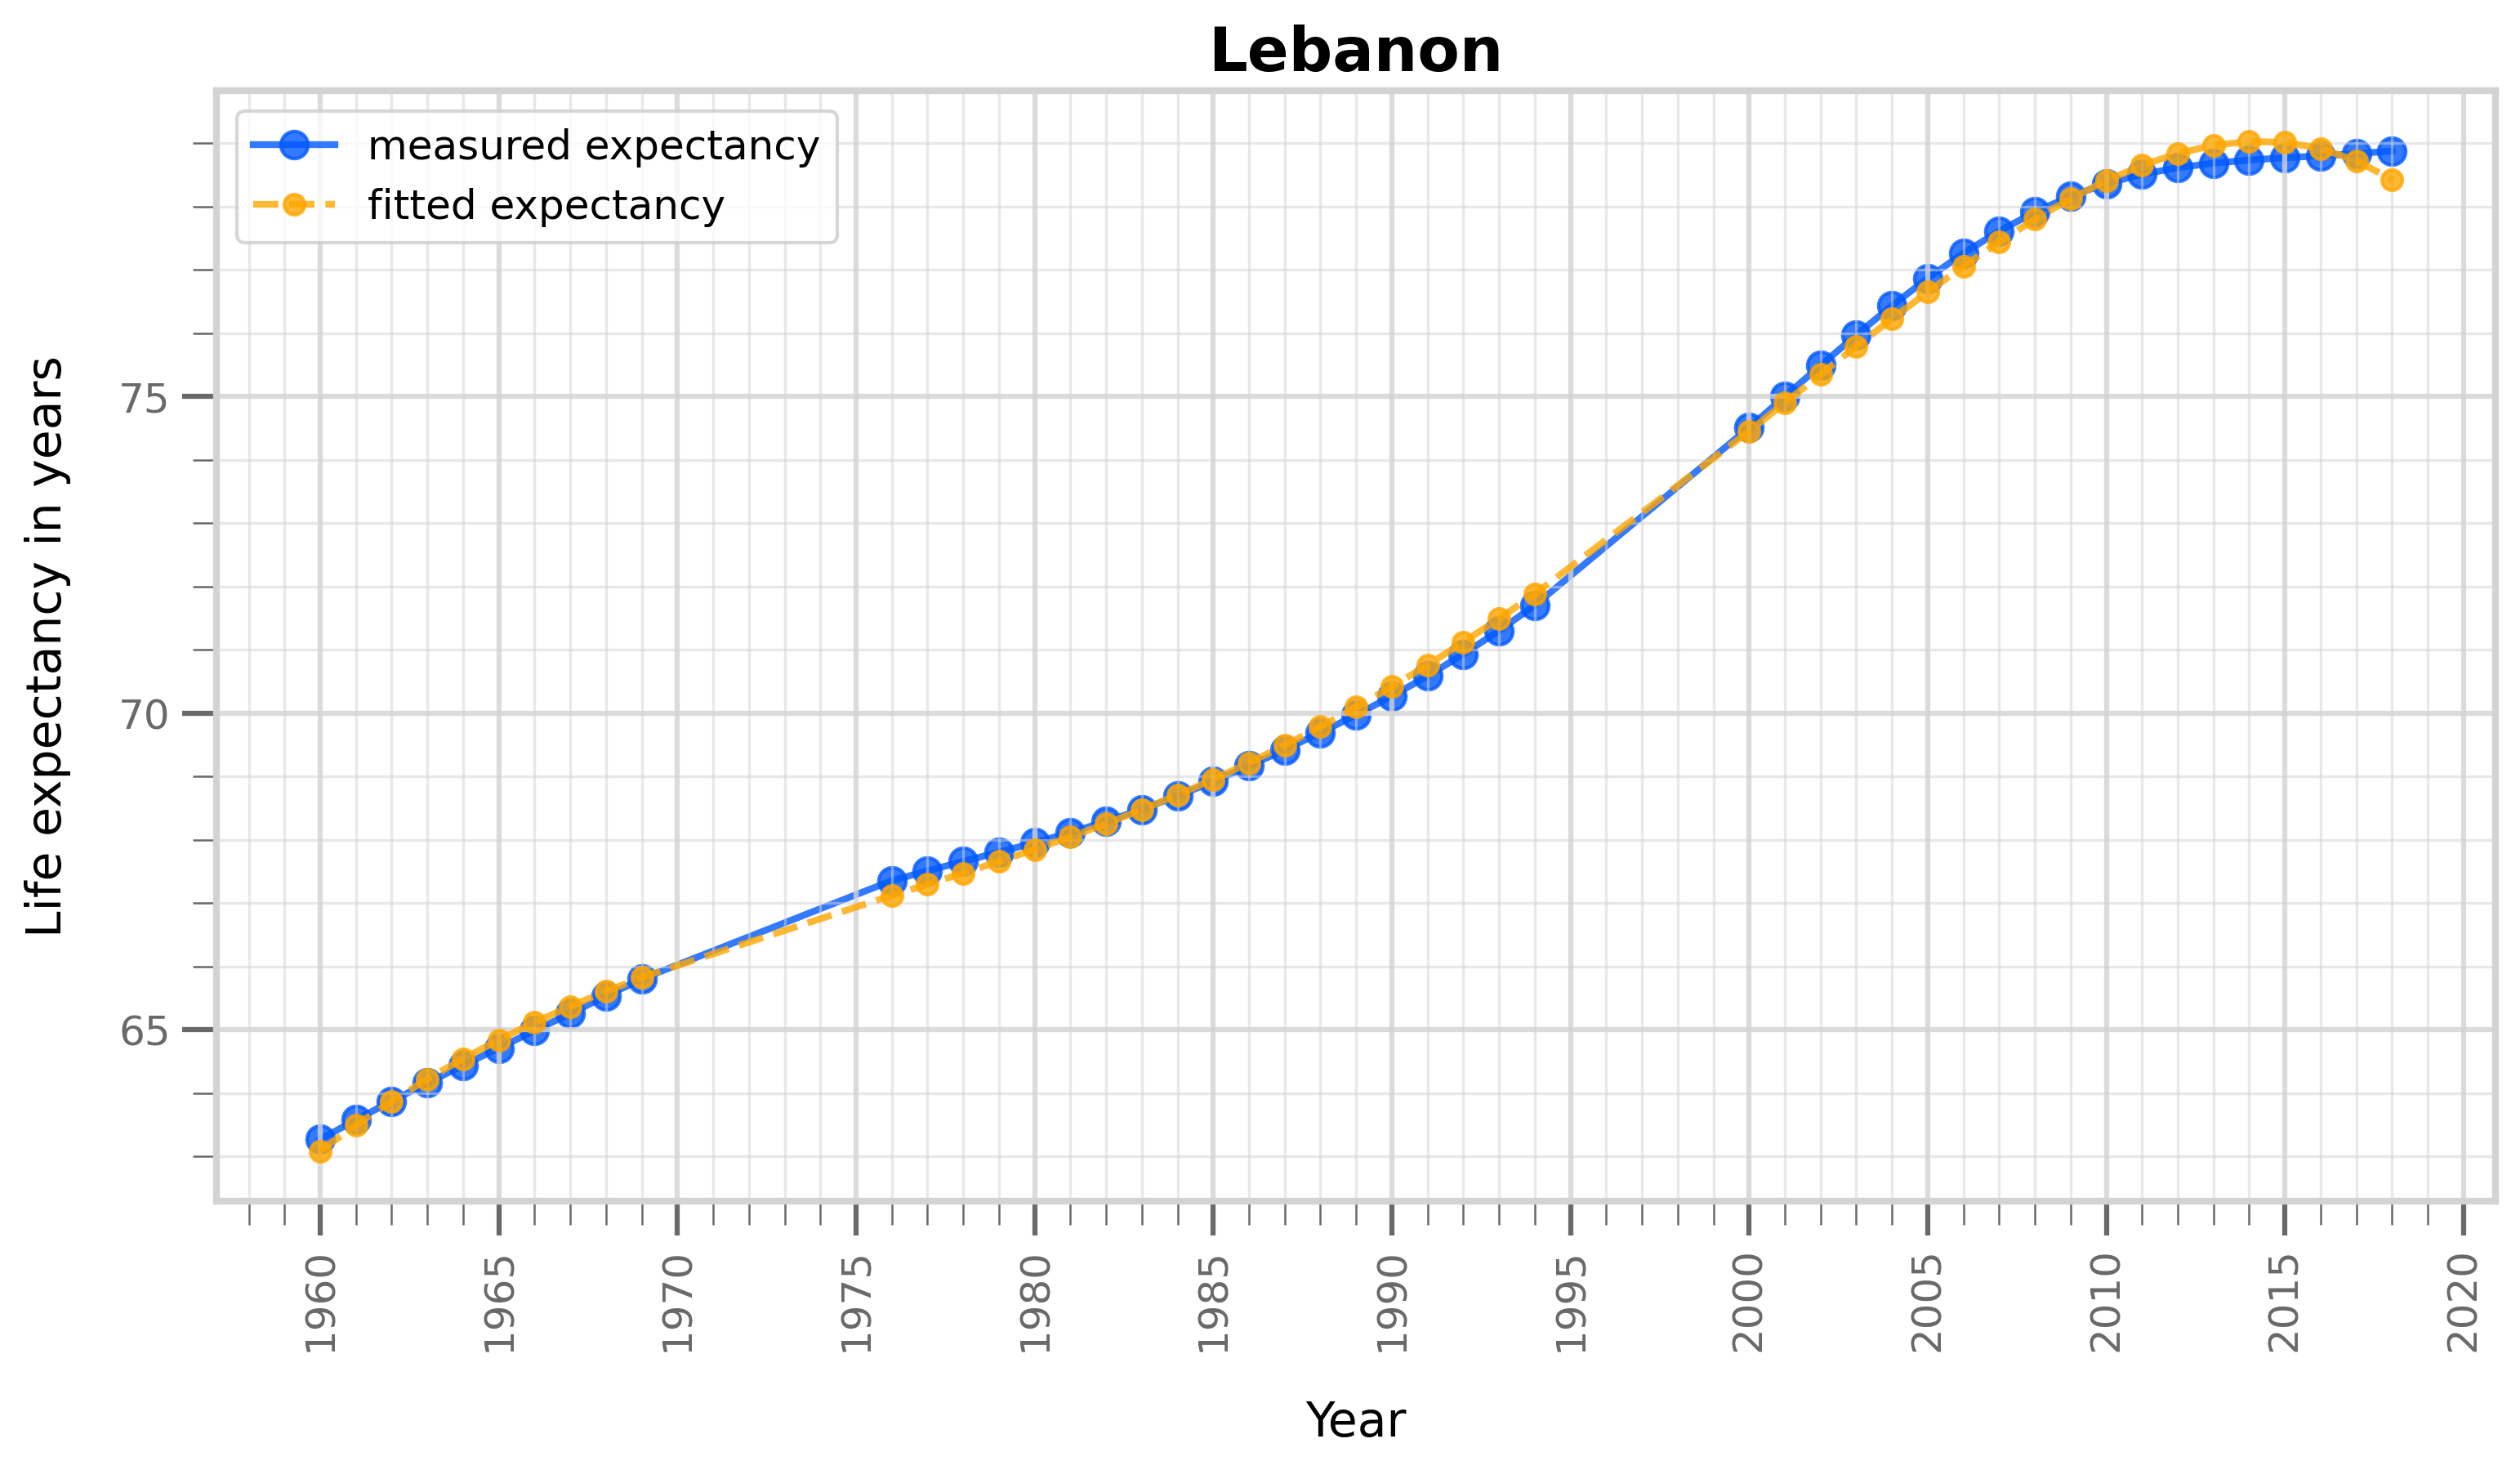

In [6]:
def plot_two_overlain_data_sets(title, x_label, y_label, y1_legend, y2_legend,
                                x1_values, y1_values, x2_values, y2_values):
    plt.rc('axes', edgecolor="lightgray", linewidth=2)
    plt.figure(dpi=300, figsize=(12, 6))

    plt.grid(which='major', alpha=0.8, color='lightgray', linestyle='-', linewidth=1.5)
    plt.grid(which='minor', alpha=0.5, color='lightgray', linestyle='-')
    plt.grid(True)

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, labelpad=14)
    plt.ylabel(y_label, fontsize=14, labelpad=14)

    plt.tick_params(axis='both', colors='dimgray', labelsize=12, length=10, width=1.5)
    plt.xticks(np.arange(min(x1_values), max(x1_values) + 5, 5), rotation='90')
    plt.yticks(np.arange(0, 100, 5))

    plt.tick_params(which='minor', color='dimgray', length=7)
    plt.minorticks_on()

    # color format: (red, green, blue, transparency) with values between 0 and 1
    plt.plot(x1_values, y1_values, label=y1_legend,
             color=(0, 0.35, 1, 0.8), linewidth=2, linestyle="solid", zorder=1,
             marker="o", markersize=8, markerfacecolor=(0, 0.35, 1, 0.8))
    plt.plot(x2_values, y2_values, label=y2_legend,
             color=(1, 0.65, 0, 0.8), linewidth=2, linestyle="dashed", zorder=2,
             marker="o", markersize=6, markerfacecolor=(1, 0.65, 0, 0.8))

    plt.legend(loc='upper left', fontsize=12)

    plt.show()


def data_row_value_lists(data_frame: pd.DataFrame, column_name: str):
    row_value_lists = []  # list of lists

    for index in range(len(data_frame)):
        row = data_frame.iloc[index]

        row_value_lists.append(
            row.loc[column_name:].values.tolist()  # values from given column to end of row
        )

    return row_value_lists


def polynomially_fitted_value_lists(x_values, lists_of_y_values, degree):
    fitted_y_value_lists = []  # list of lists

    for y_values in lists_of_y_values:
        coefficients = np.polyfit(x_values, y_values, degree)
        polynomial   = np.poly1d(coefficients)

        fitted_y_value_lists.append(
            polynomial(x_values).tolist()
        )

    return fitted_y_value_lists


# suppress warnings about polynomial fit quality
warnings.simplefilter('ignore', np.RankWarning)

# years from 1960 to 2018. without 1970 to 1975 and 1995 to 1999.
partial_years = list(range(1960, 1970)) + list(range(1976, 1995)) + list(range(2000, 2019))

random_countries        = expectancy_dataframe.sample(5)
expectancy_lists        = data_row_value_lists(random_countries, "1960")
fitted_expectancy_lists = polynomially_fitted_value_lists(partial_years, expectancy_lists, 6)

for country_index in range(len(random_countries)):
    plot_two_overlain_data_sets(
        random_countries.iloc[country_index].loc["Country_Name"],
        "Year", "Life expectancy in years", "measured expectancy", "fitted expectancy",
        partial_years, expectancy_lists[country_index],
        partial_years, fitted_expectancy_lists[country_index]
    )

### Task 3
**Goals**: Interpolate the life expectancy, of the previously taken country samples,
including the missing years from 1970 to 1975 and from 1995 to 1999. 

Subsequently, plot five graphs which overlay the interpolated life expectancy data and the 
original life expectancy data. 

And finally, display a data frame, in order to report the missing years' interpolated life 
expectancies by country.

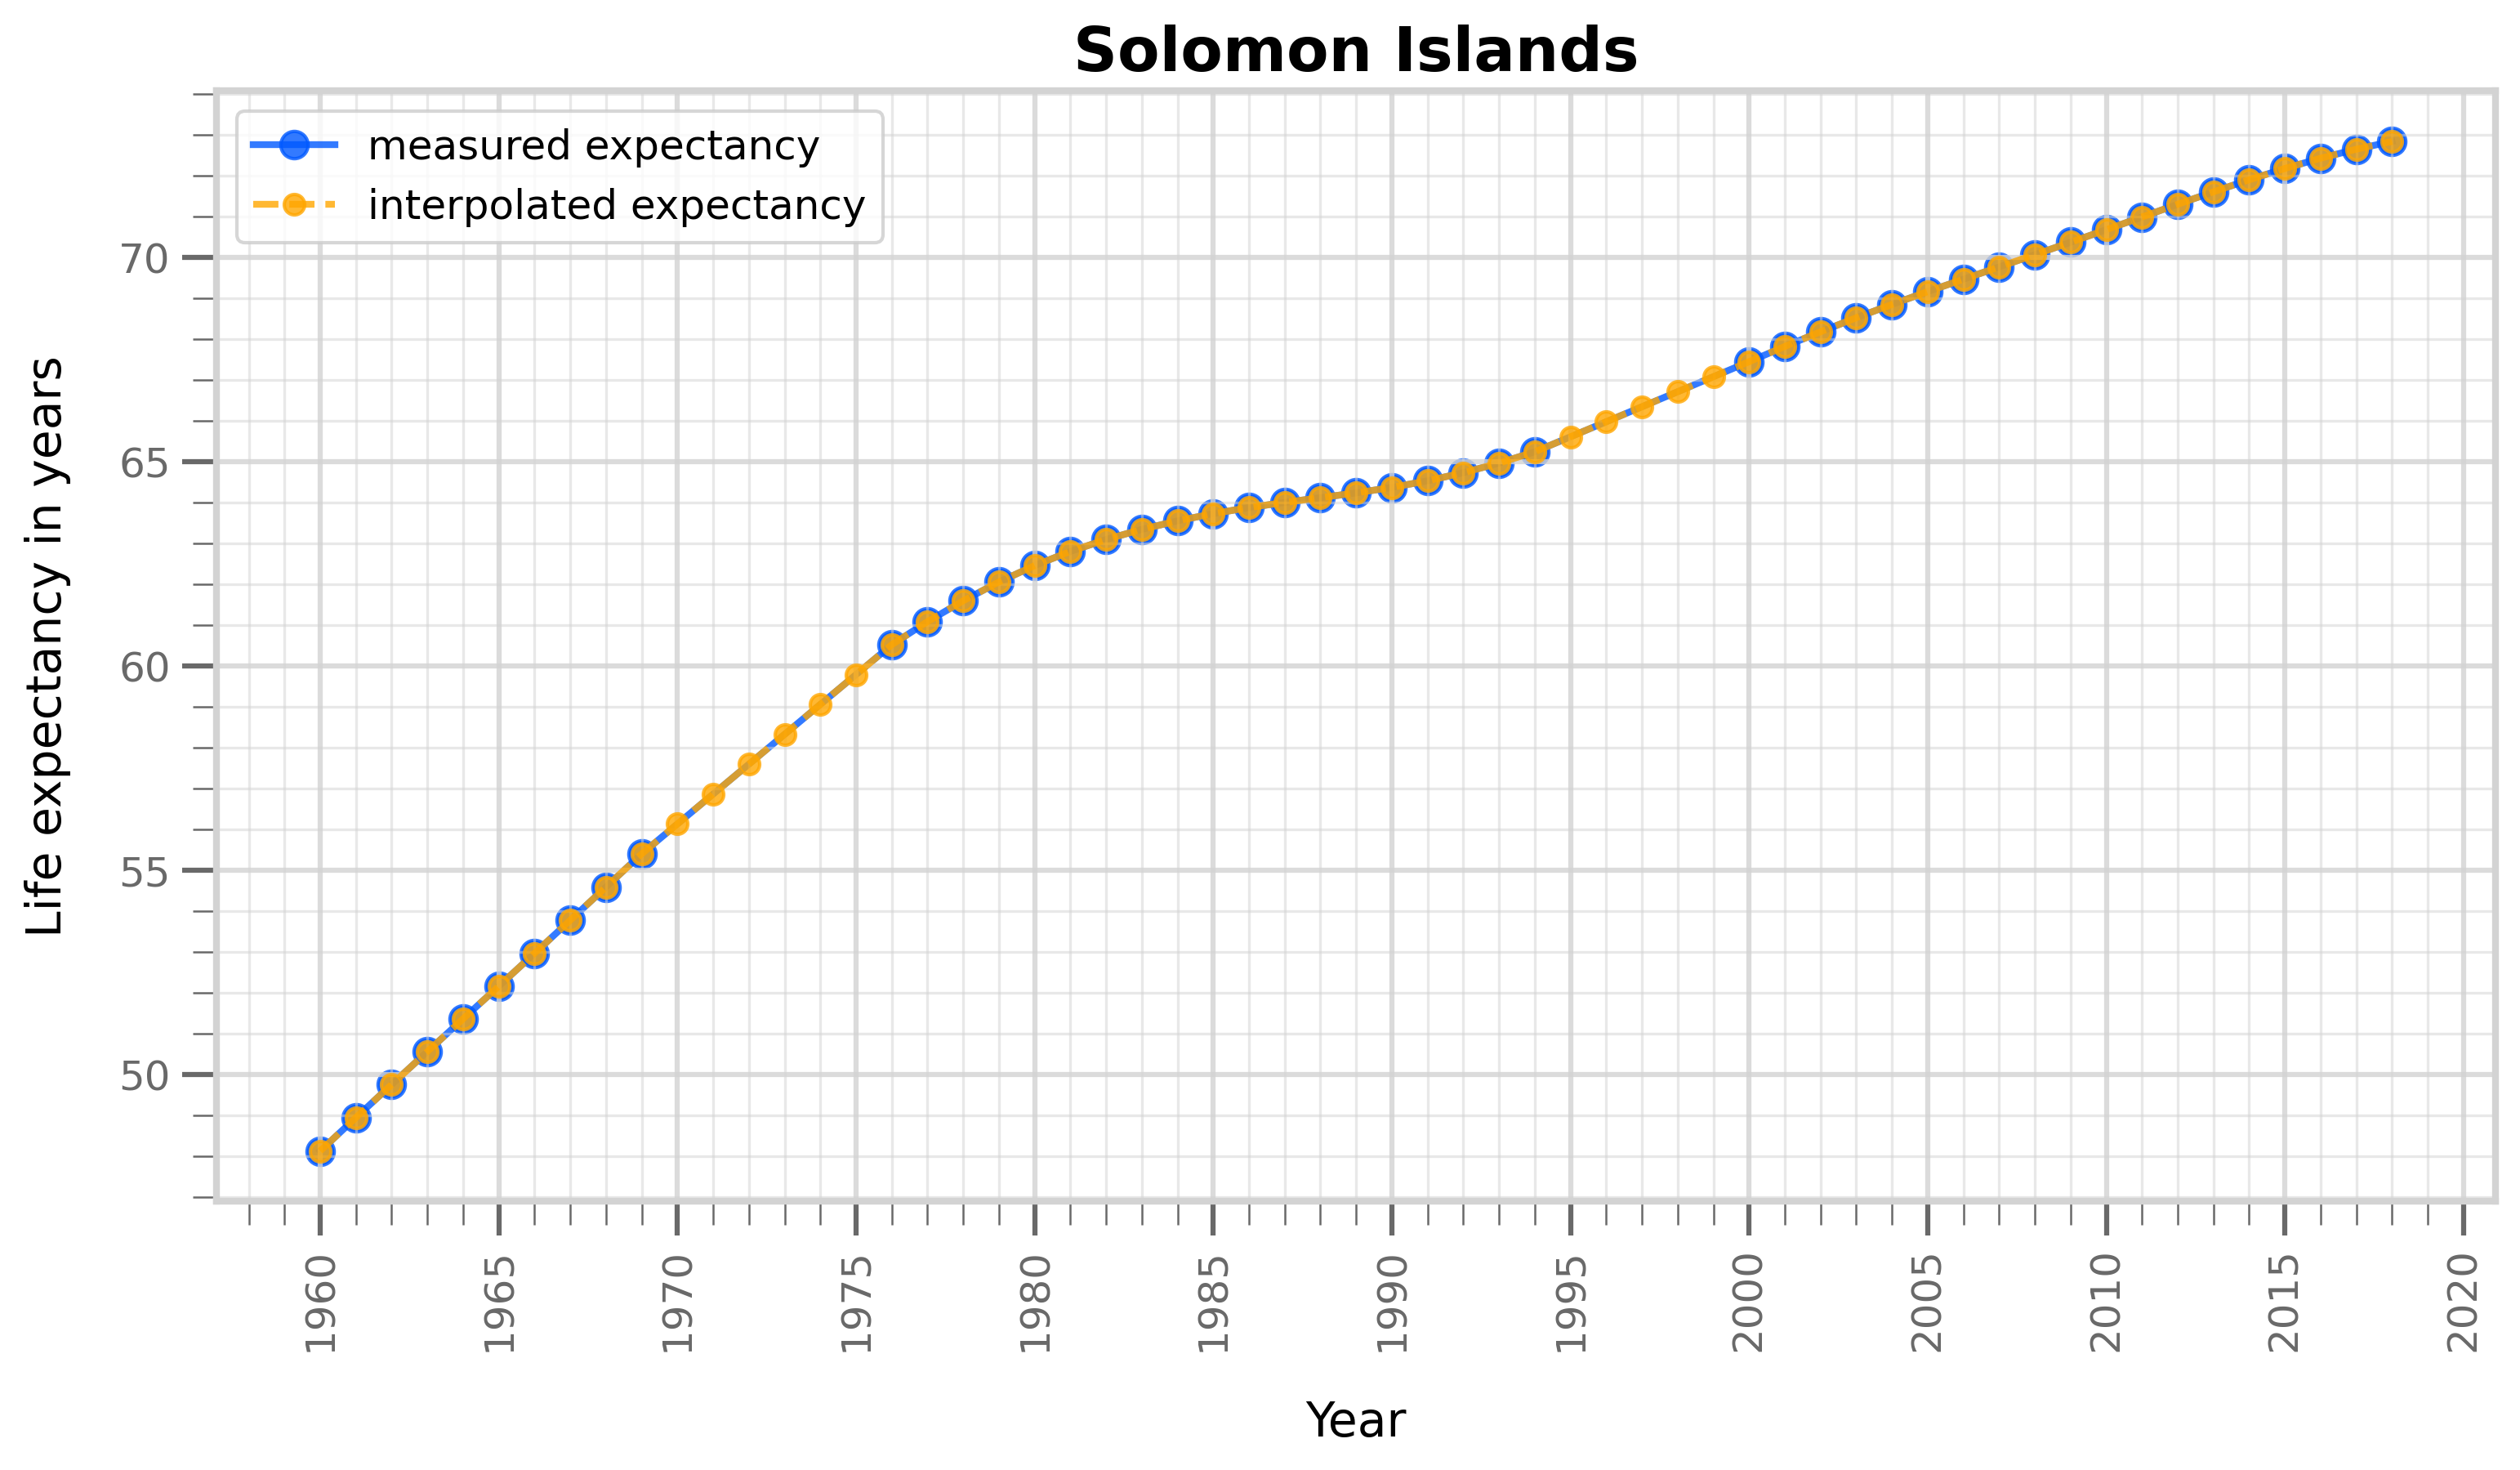

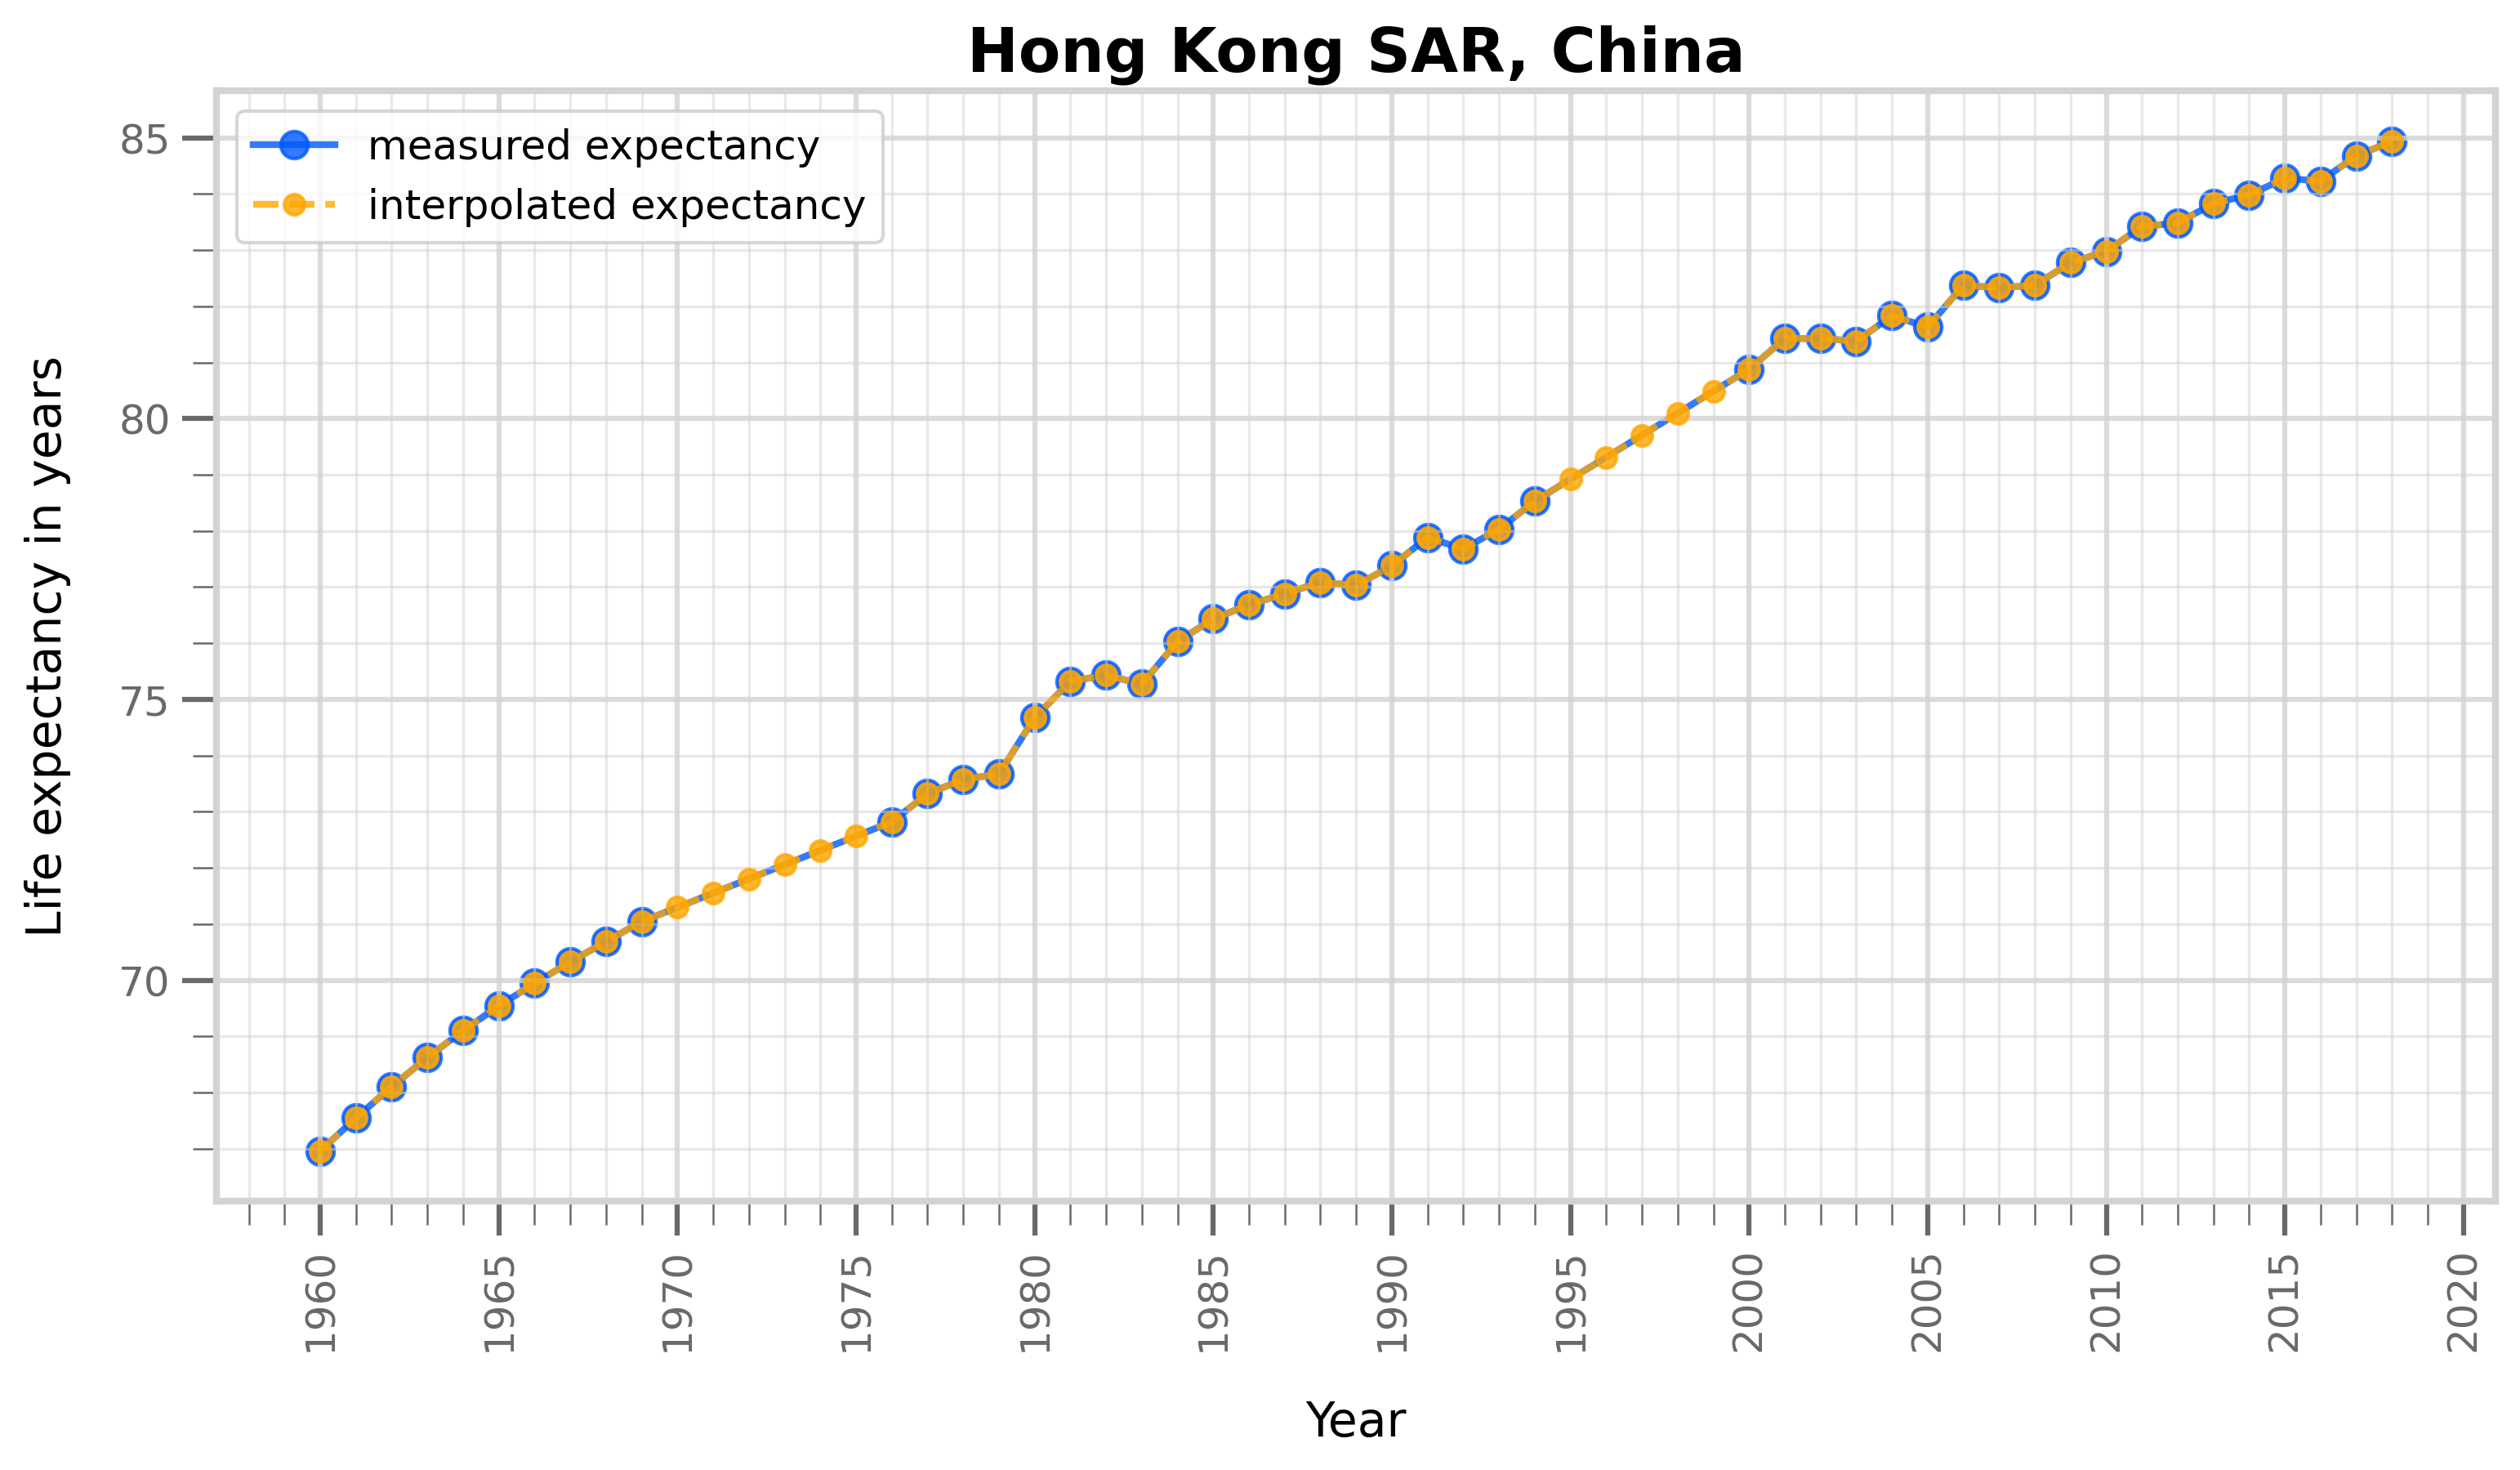

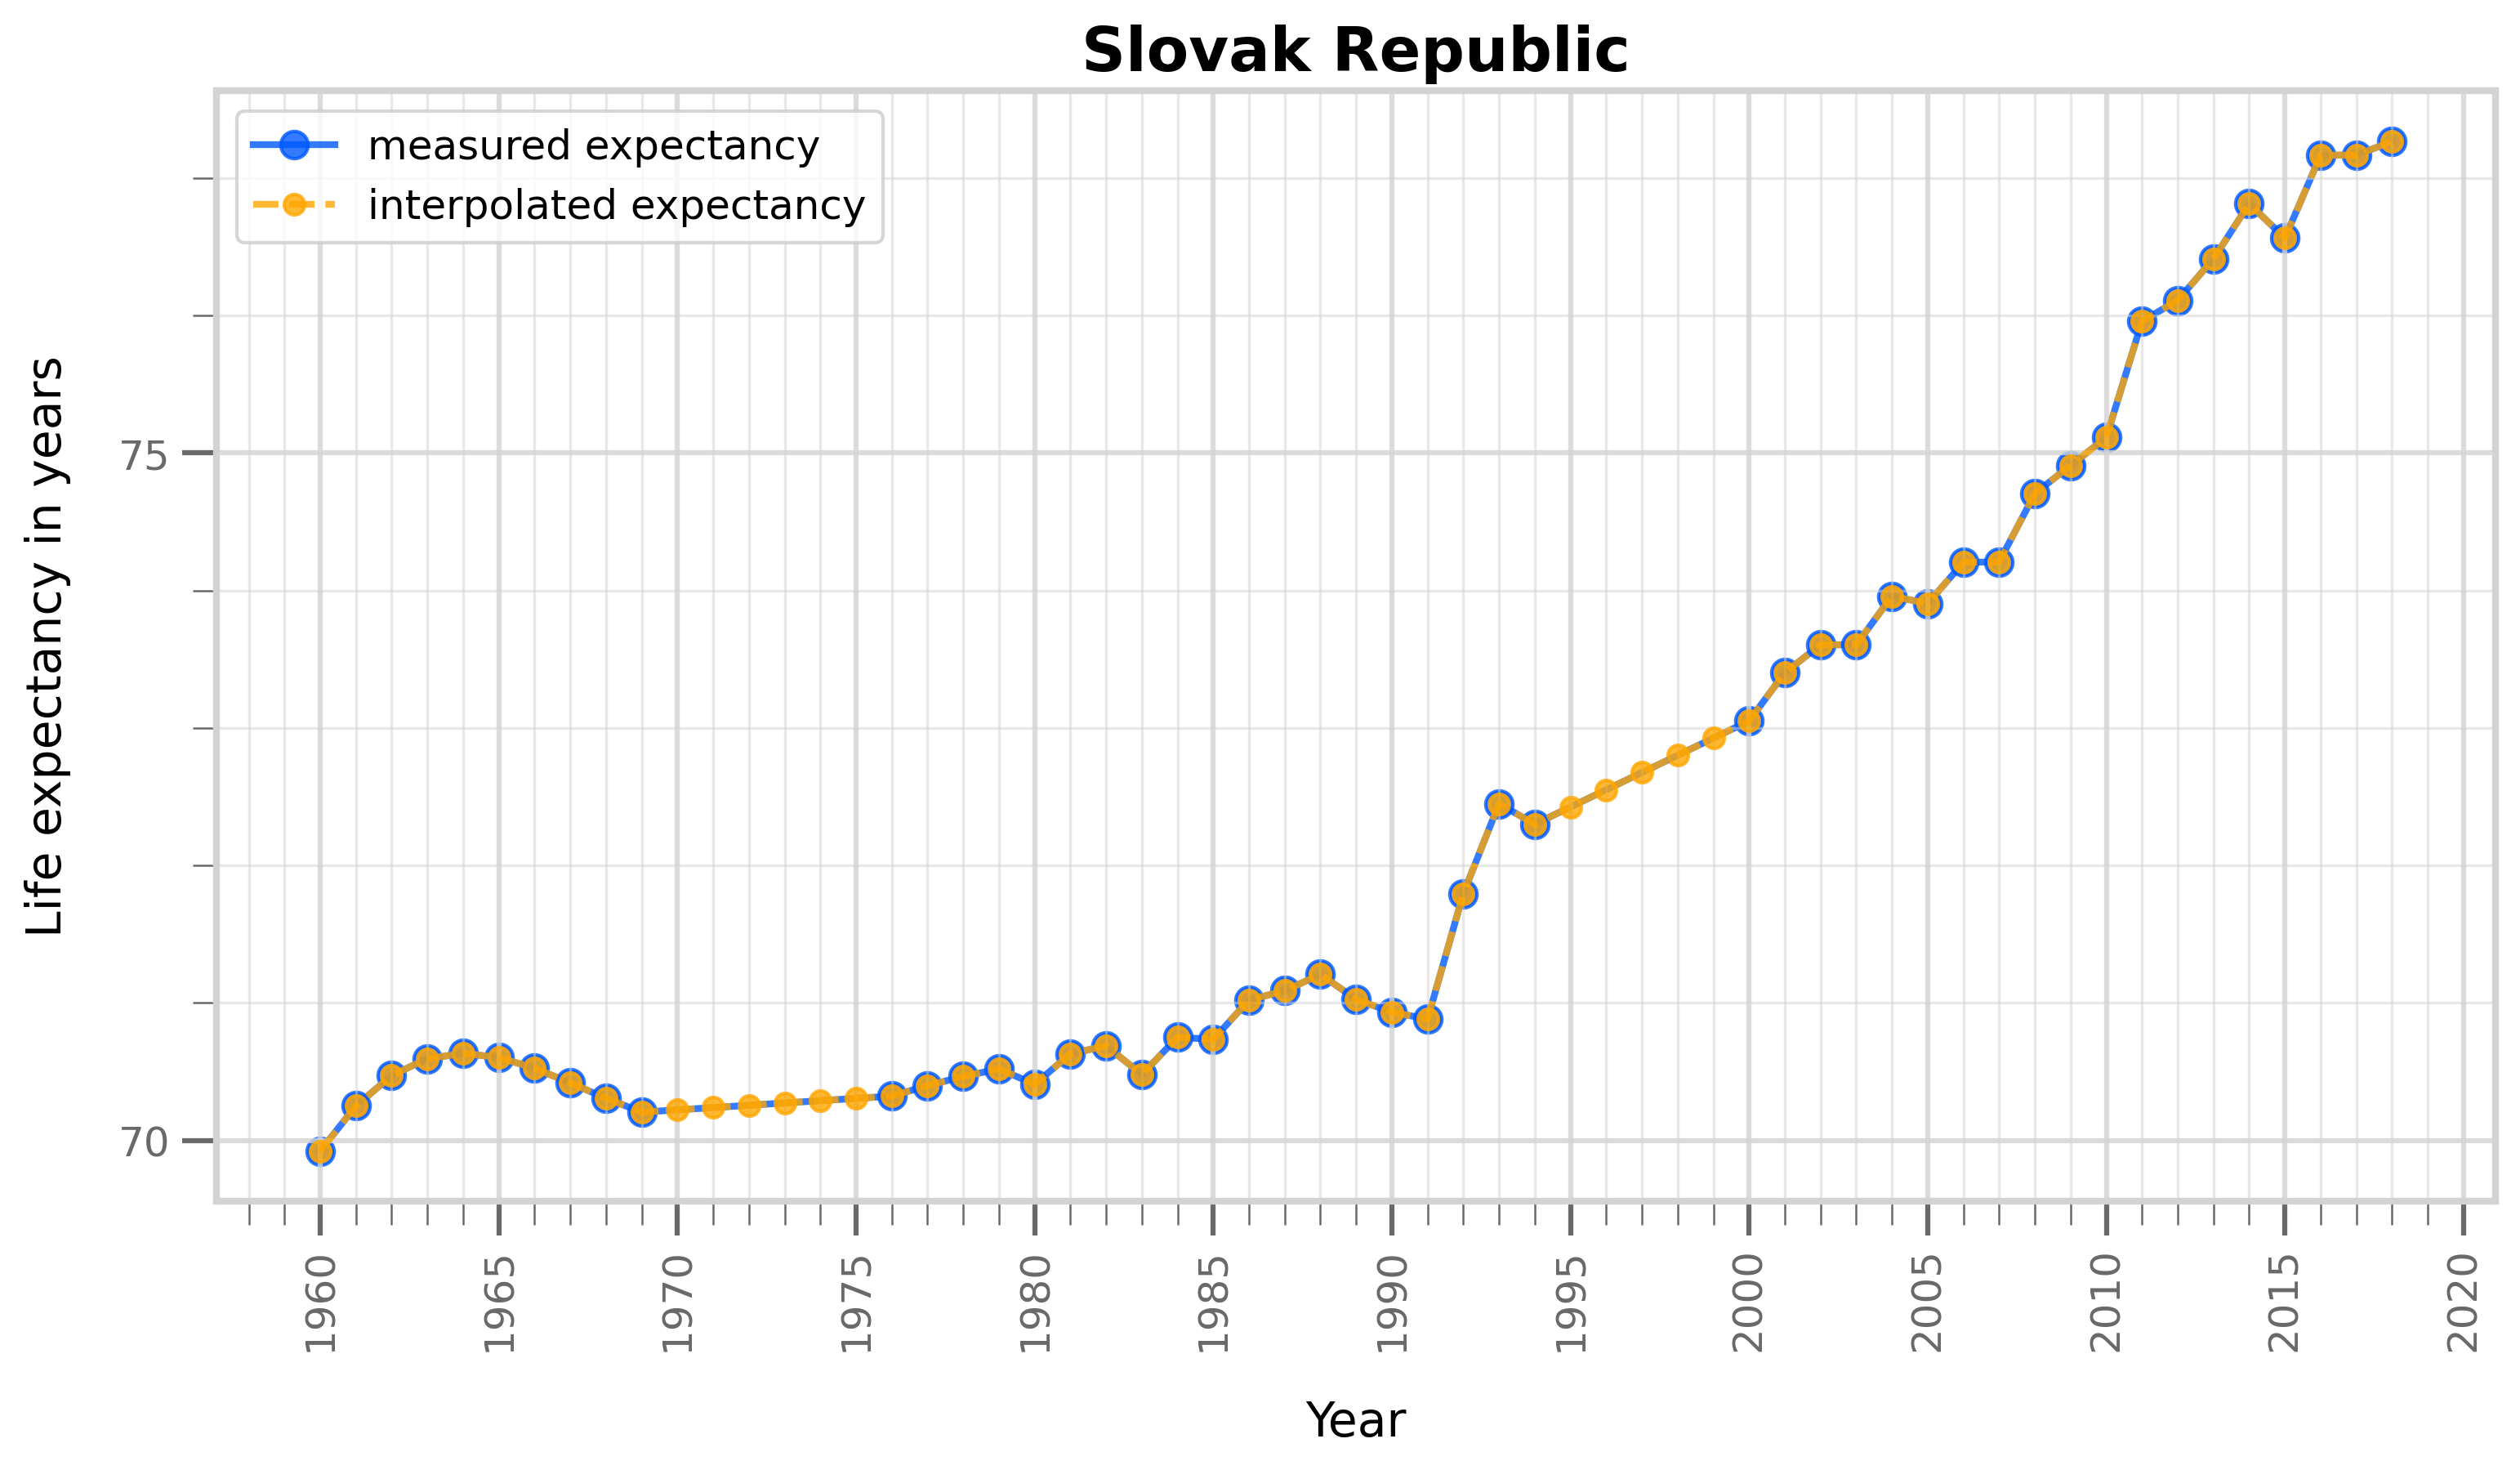

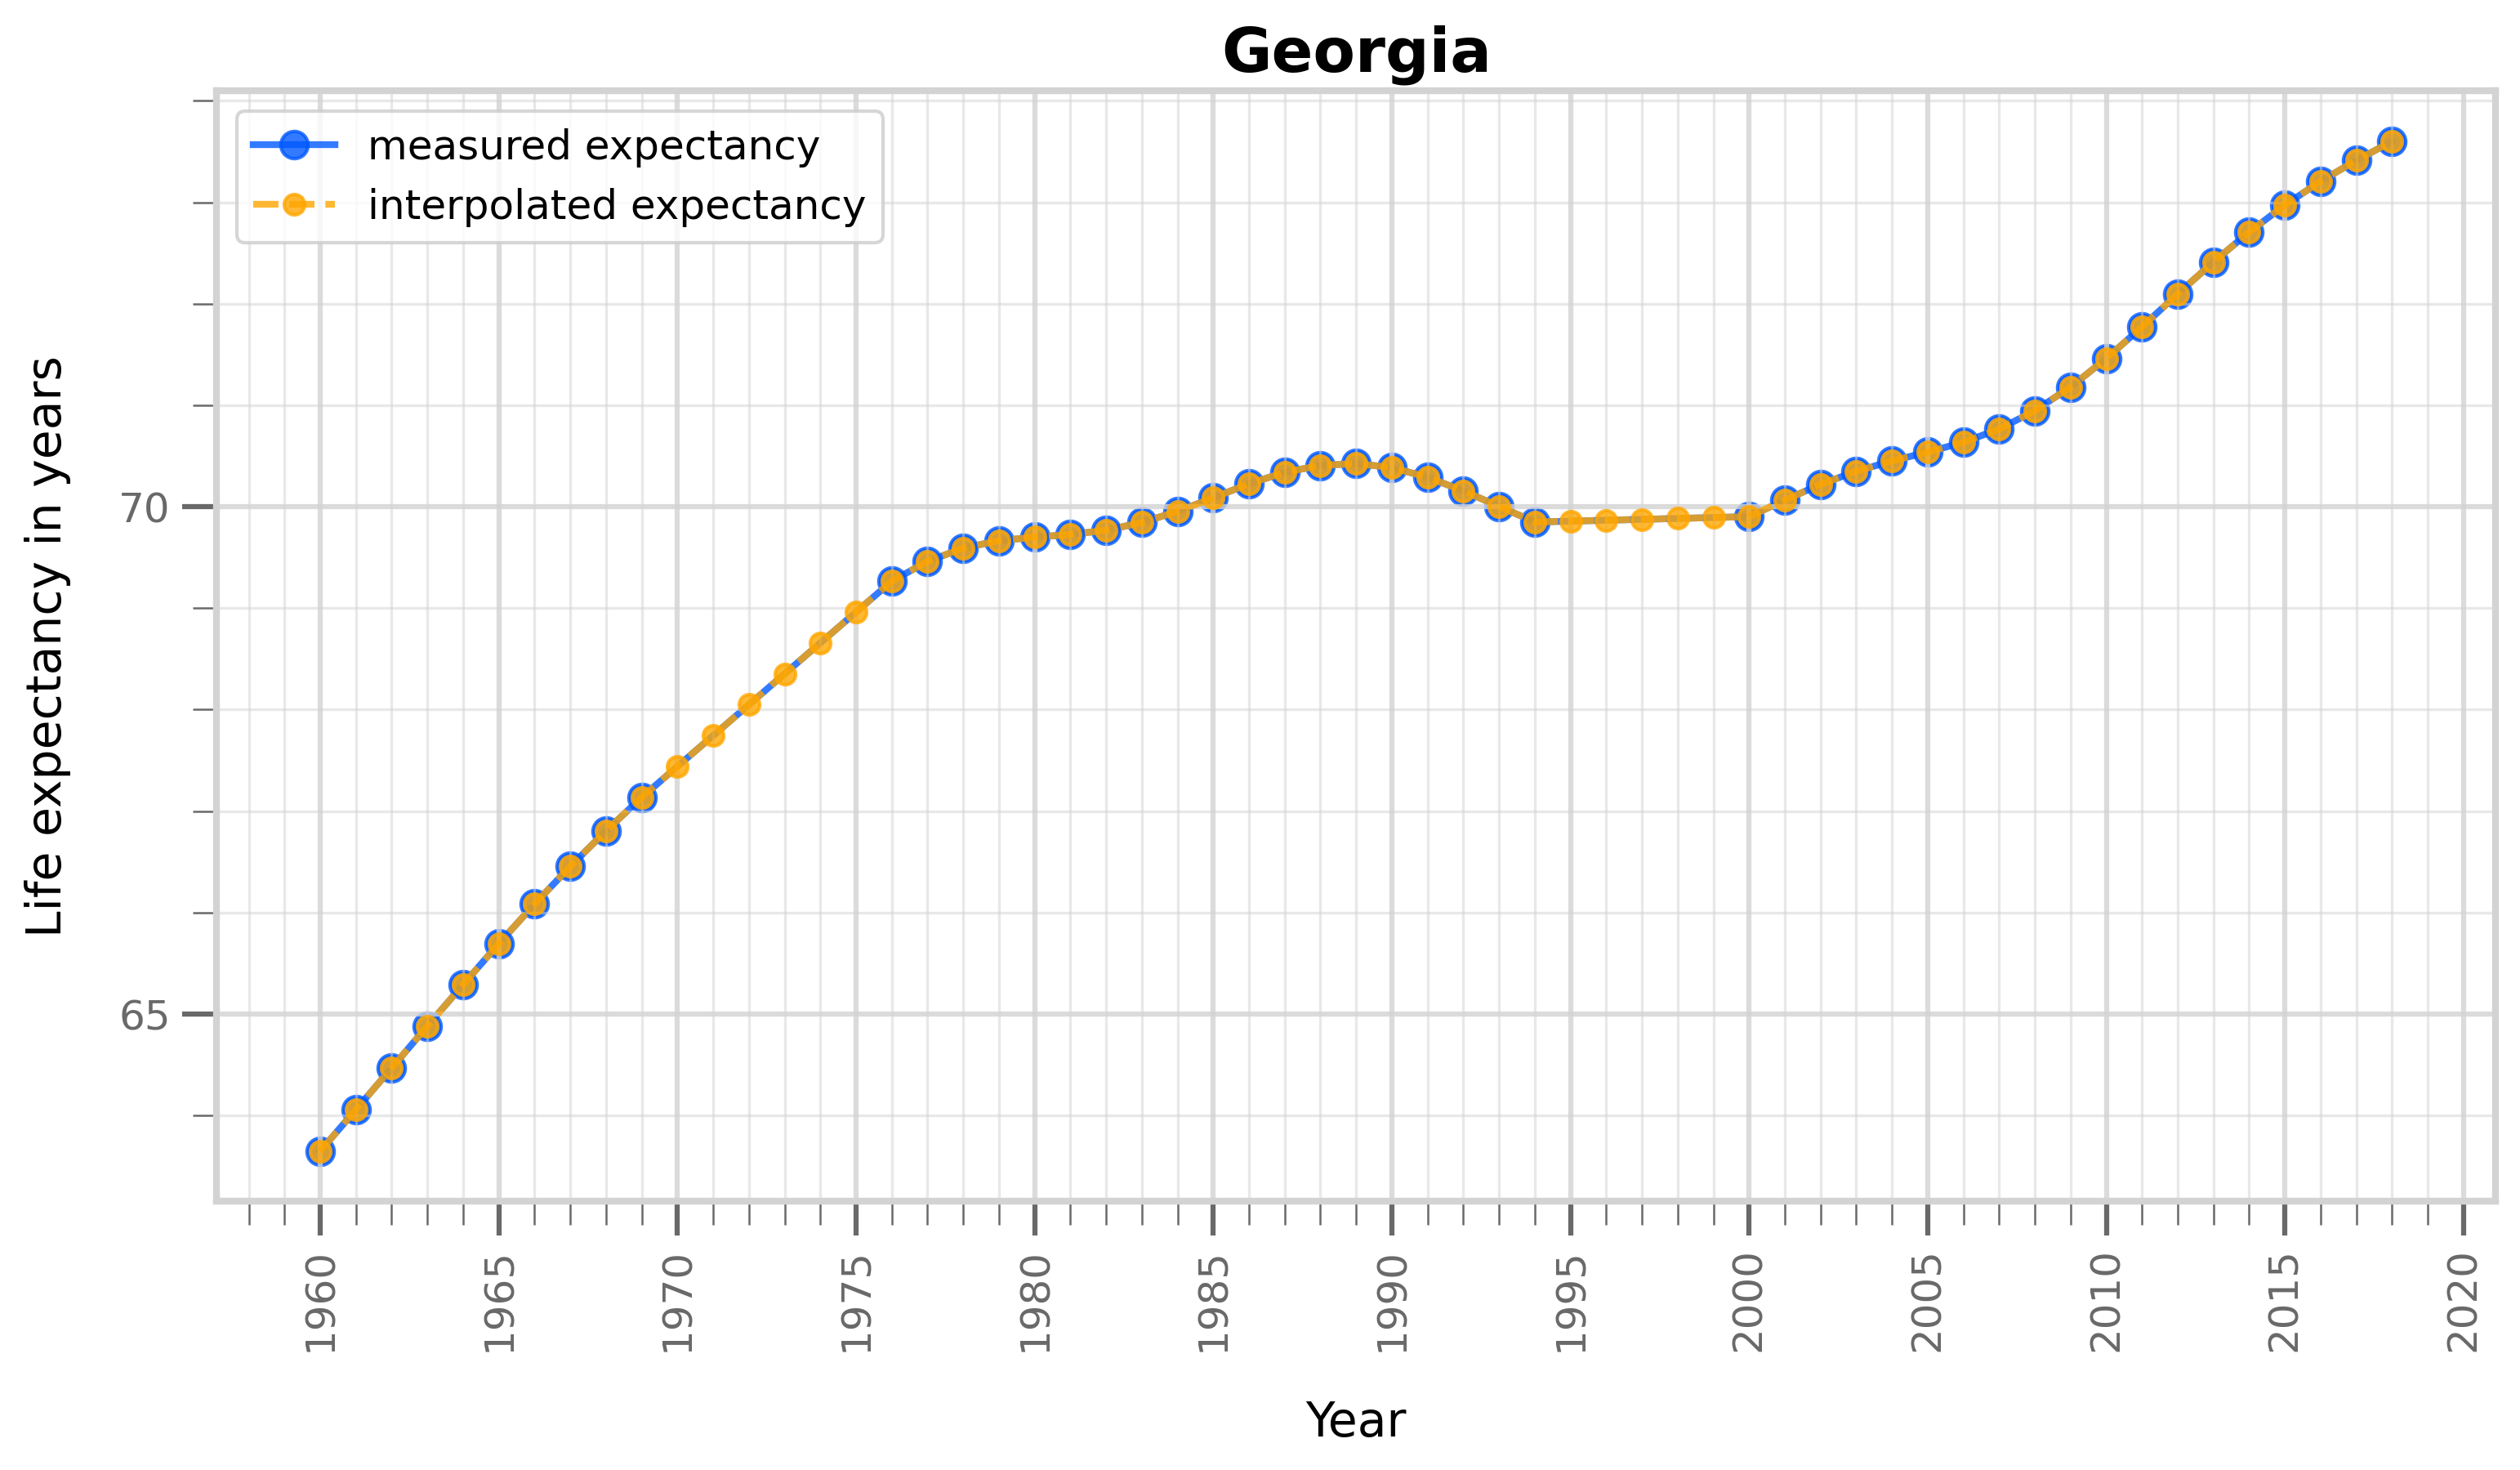

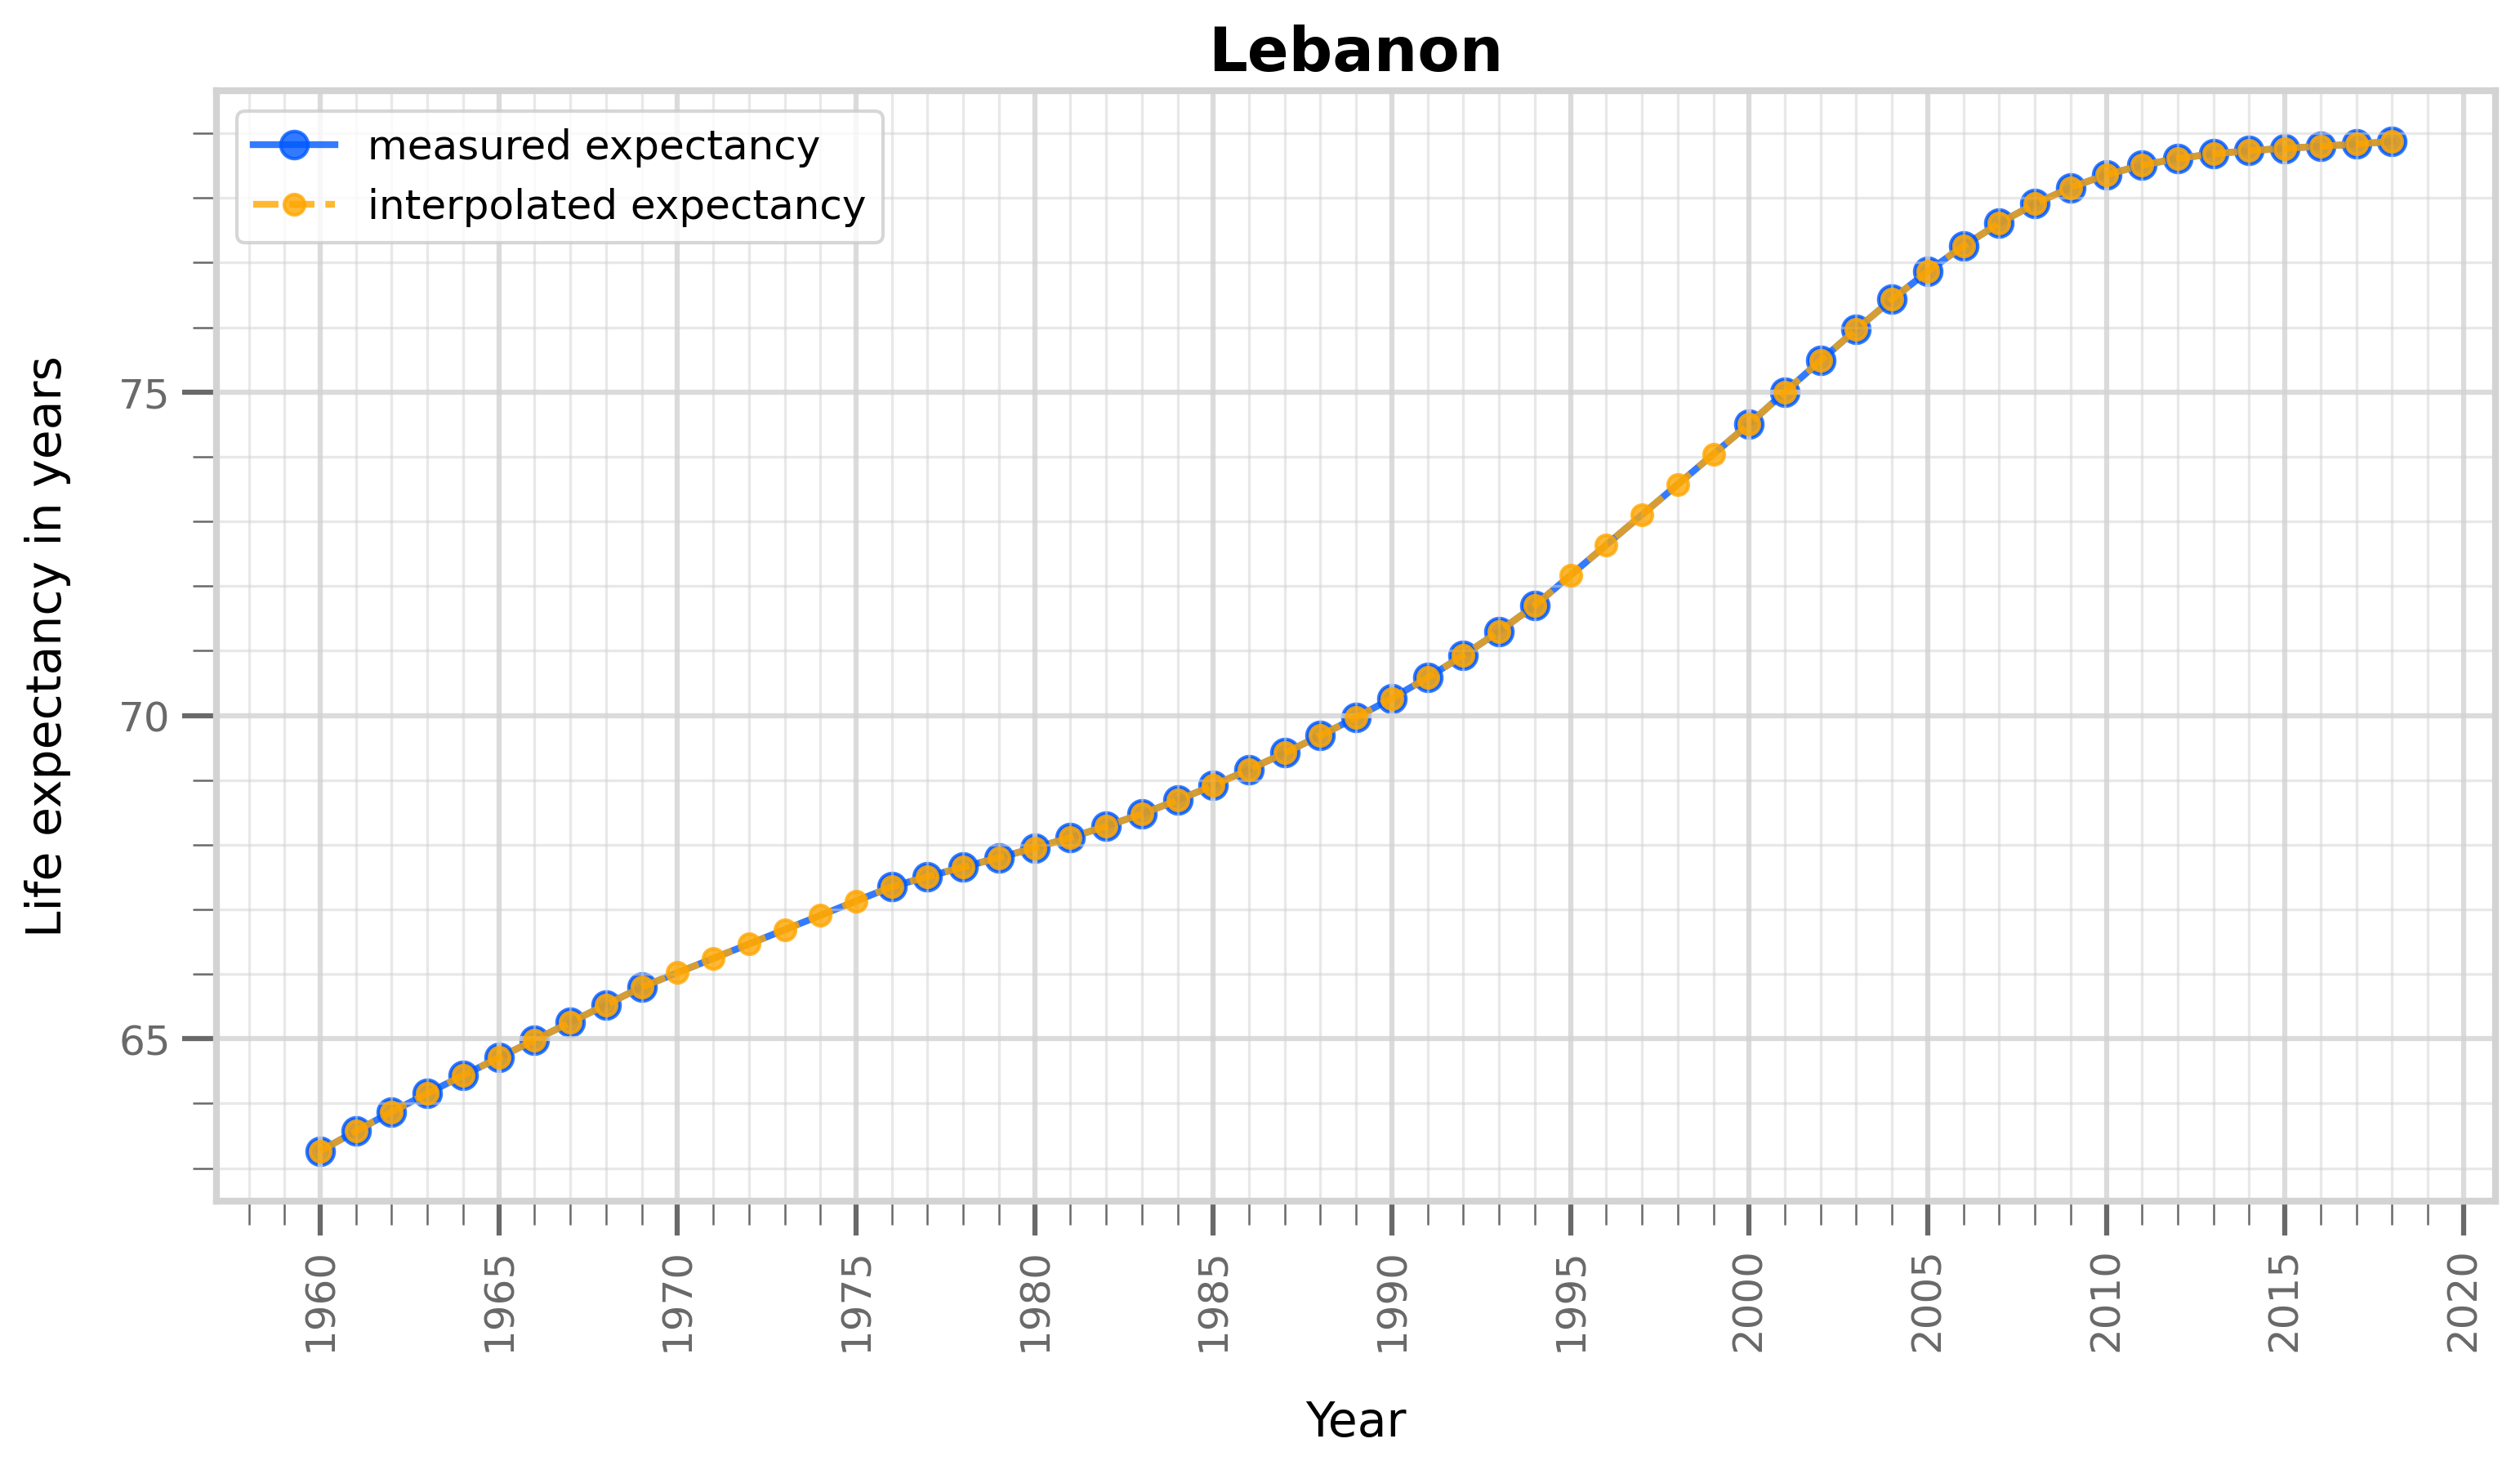

,Country Name,Missing Year,Interpolated Life Expectancy
0,Solomon Islands,1970,56.127286
1,Solomon Islands,1971,56.858571
2,Solomon Islands,1972,57.589857
3,Solomon Islands,1973,58.321143
4,Solomon Islands,1974,59.052429
5,Solomon Islands,1975,59.783714
6,Solomon Islands,1995,65.604500
7,Solomon Islands,1996,65.972000
8,Solomon Islands,1997,66.339500
9,Solomon Islands,1998,66.707000


In [7]:
def interpolated_value_lists(old_x_values, new_x_values, old_y_values_lists):
    interpolated_y_value_lists = []  # list of lists

    for old_y_values in old_y_values_lists:
        interpolation_function = interp1d(old_x_values, old_y_values)
        
        interpolated_y_value_lists.append(
            interpolation_function(new_x_values).tolist()
        )

    return interpolated_y_value_lists


missing_years = list(range(1970, 1976)) + list(range(1995, 2000))
all_years     = sorted(partial_years + missing_years)

# indices of year positions in used lists: {1960 : 0, 1961 : 1, ..., 2019 : 58}
year_indices  = dict((value, key) for (key, value) in enumerate(all_years))

country_column    = 'Country Name'
year_column       = 'Missing Year'
expectancy_column = 'Interpolated Life Expectancy'

report_dataframe = \
    pd.DataFrame({country_column: [], year_column: [], expectancy_column: []})

interpolated_expectancy_lists = \
    interpolated_value_lists(partial_years, all_years, expectancy_lists)

for country_index in range(len(random_countries)):
    country = random_countries.iloc[country_index].loc["Country_Name"]

    for year in missing_years:
        report_dataframe = report_dataframe.append({
            country_column   : country, 
            year_column      : year,
            expectancy_column: 
                interpolated_expectancy_lists[country_index][year_indices[year]]
        }, ignore_index=True)

    plot_two_overlain_data_sets(
        country, "Year", "Life expectancy in years",
        "measured expectancy", "interpolated expectancy",
        partial_years, expectancy_lists[country_index],
        all_years, interpolated_expectancy_lists[country_index]
    )

print("\n\n")
report_dataframe[year_column] = report_dataframe[year_column].astype(int) # convert years to int
report_dataframe